In [1]:
import necstdb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import  xarray as xr
import pandas as pd
import matplotlib.dates as md
import datetime as dt
import time
import allantools
from scipy.interpolate import interp1d
from scipy import signal

In [2]:
#path="/mnt/usbdisk9/data/hot_monitor_1h20200316_042810.necstdb/"
path = "/mnt/usbdisk9/data/hot_monitor_1h20200319_070255.necstdb"

In [3]:
beamname = {
'ac240_tp_data_1': 'Beam1 - LL',
'ac240_tp_data_2': 'Beam1 - LU',
'xffts_power_board01': 'Beam2 - LU',
'xffts_power_board02': 'Beam2 - LL',
'xffts_power_board03': 'Beam2 - RU',
'xffts_power_board04': 'Beam2 - RL',
'xffts_power_board05': 'Beam3 - LU',
'xffts_power_board06': 'Beam3 - LL',
'xffts_power_board07': 'Beam3 - RU',
'xffts_power_board08': 'Beam3 - RL',
'xffts_power_board09': 'Beam4 - LU',
'xffts_power_board10': 'Beam4 - LL',
'xffts_power_board11': 'Beam4 - RU',
'xffts_power_board12': 'Beam4 - RL',
'xffts_power_board13': 'Beam5 - LU',
'xffts_power_board14': 'Beam5 - LL',
'xffts_power_board15': 'Beam5 - RU',
'xffts_power_board16': 'Beam5 - RL'
}

In [4]:
#呪文を唱える
n=necstdb.opendb(path)

In [5]:
#まとめて16IF(100GHz)をxarrayに変換

data_100g_list=[]
for i in range(16):
    filename='xffts_power_board'+str(i+1).zfill(2)
    dataTuple = n.open_table(filename).read() #tuple
    dataArray = np.array(dataTuple) #ndarray
    dataXarray = xr.DataArray(dataArray.T[2],dims=['timestamp'],coords={'timestamp':dataArray.T[0]},name='tpower_'+beamname[filename])
    data_100g_list.append(dataXarray)


In [6]:
#ac240(200GHz)をxarrayに変換

data_200g_list=[]
for j in range(2):
    filename='ac240_tp_data_'+str(j+1)
    data_Array_200g = n.open_table(filename).read(astype='array') #ndarray
    data_Xarray_200g = xr.DataArray(data_Array_200g['POWER_BE1'].astype('float64'),dims=['timestamp'],coords={'timestamp':data_Array_200g['timestamp'].astype('float64')},name='tpower_'+beamname[filename])
    data_200g_list.append(data_Xarray_200g)

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


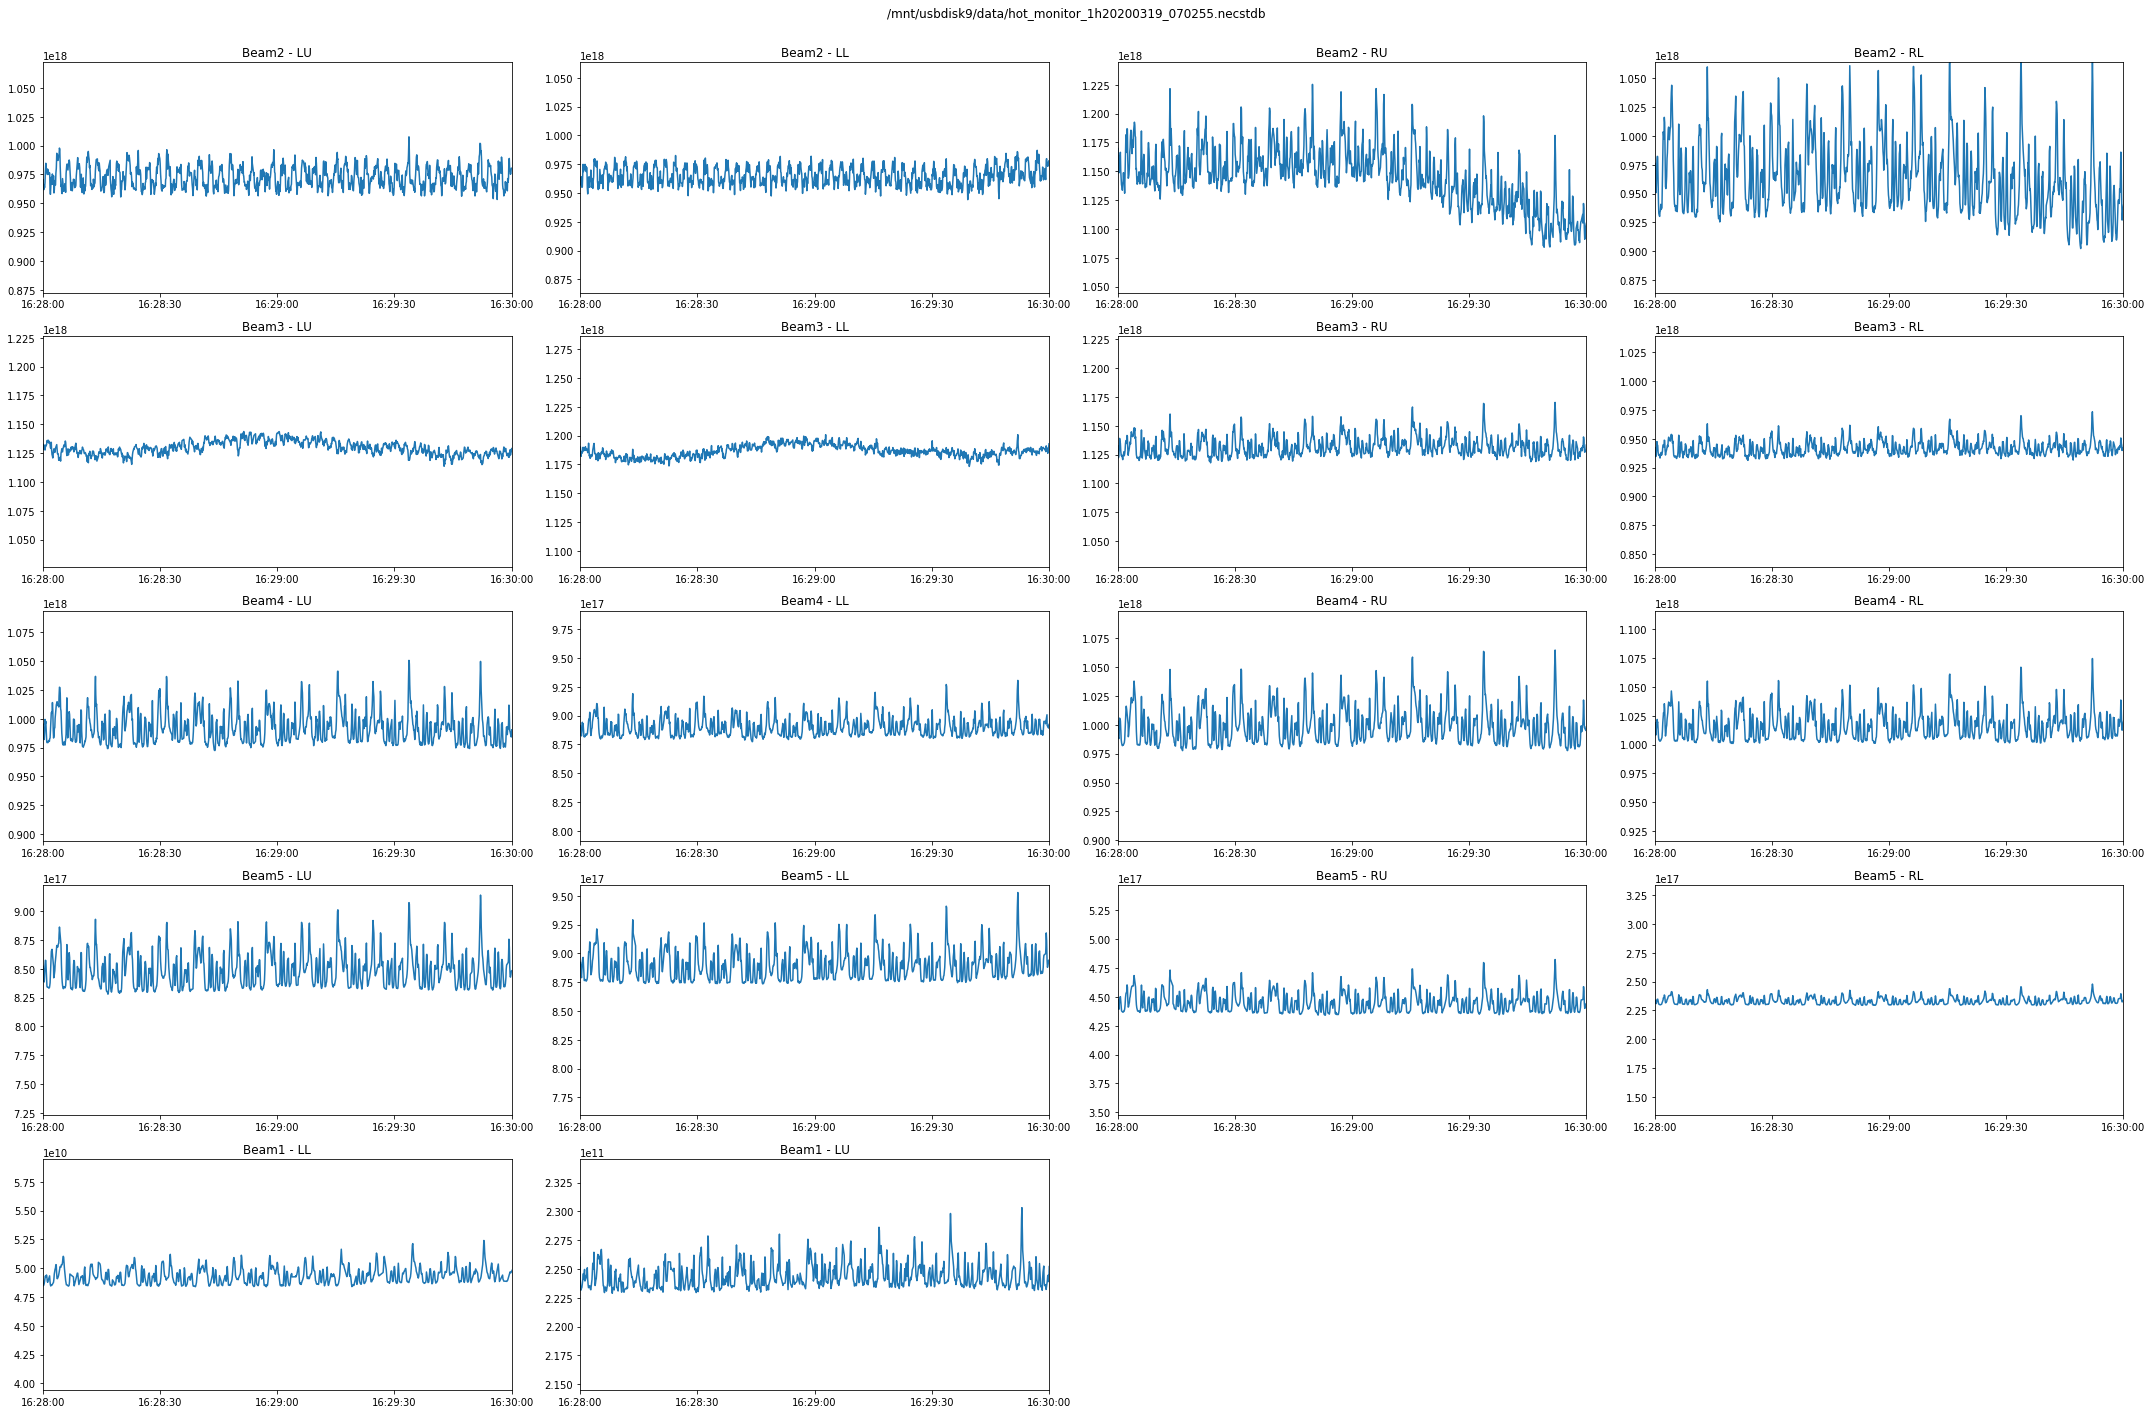

In [7]:
#グラフ作成

mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]

x_min = dt.datetime.strptime('2020-03-19-16:28', '%Y-%m-%d-%H:%M')
x_max = dt.datetime.strptime('2020-3-19-16:30', '%Y-%m-%d-%H:%M')

for ax, data_100g, num_100g in zip(ax_list, data_100g_list, num_100g_list):
    timearray=[dt.datetime.fromtimestamp(ts) for ts in data_100g.coords["timestamp"].values]
    data_y = data_100g.values
    ax.plot(timearray , data_y)
    
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([data_y.mean() - 1e+17, data_y.mean() + 1e+17])
    
    ax.xaxis.set_major_locator(md.SecondLocator(bysecond=range(0, 60, 30)))
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)])
    
    
num_200g_list = [1,2]
    
for ax, data_200g, num_200g in zip(ax_list[16:], data_200g_list, num_200g_list):
    timearray=[dt.datetime.fromtimestamp(ts) for ts in data_200g.coords["timestamp"].values]
    ax.plot(timearray , data_200g.values)
    
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([data_200g.values.mean() - 0.1e+11, data_200g.values.mean() + 0.1e+11])
    ax.xaxis.set_major_locator(md.SecondLocator(bysecond=range(0, 60, 30)))
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)])

mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.96]) #タイトル , subplotsの調整

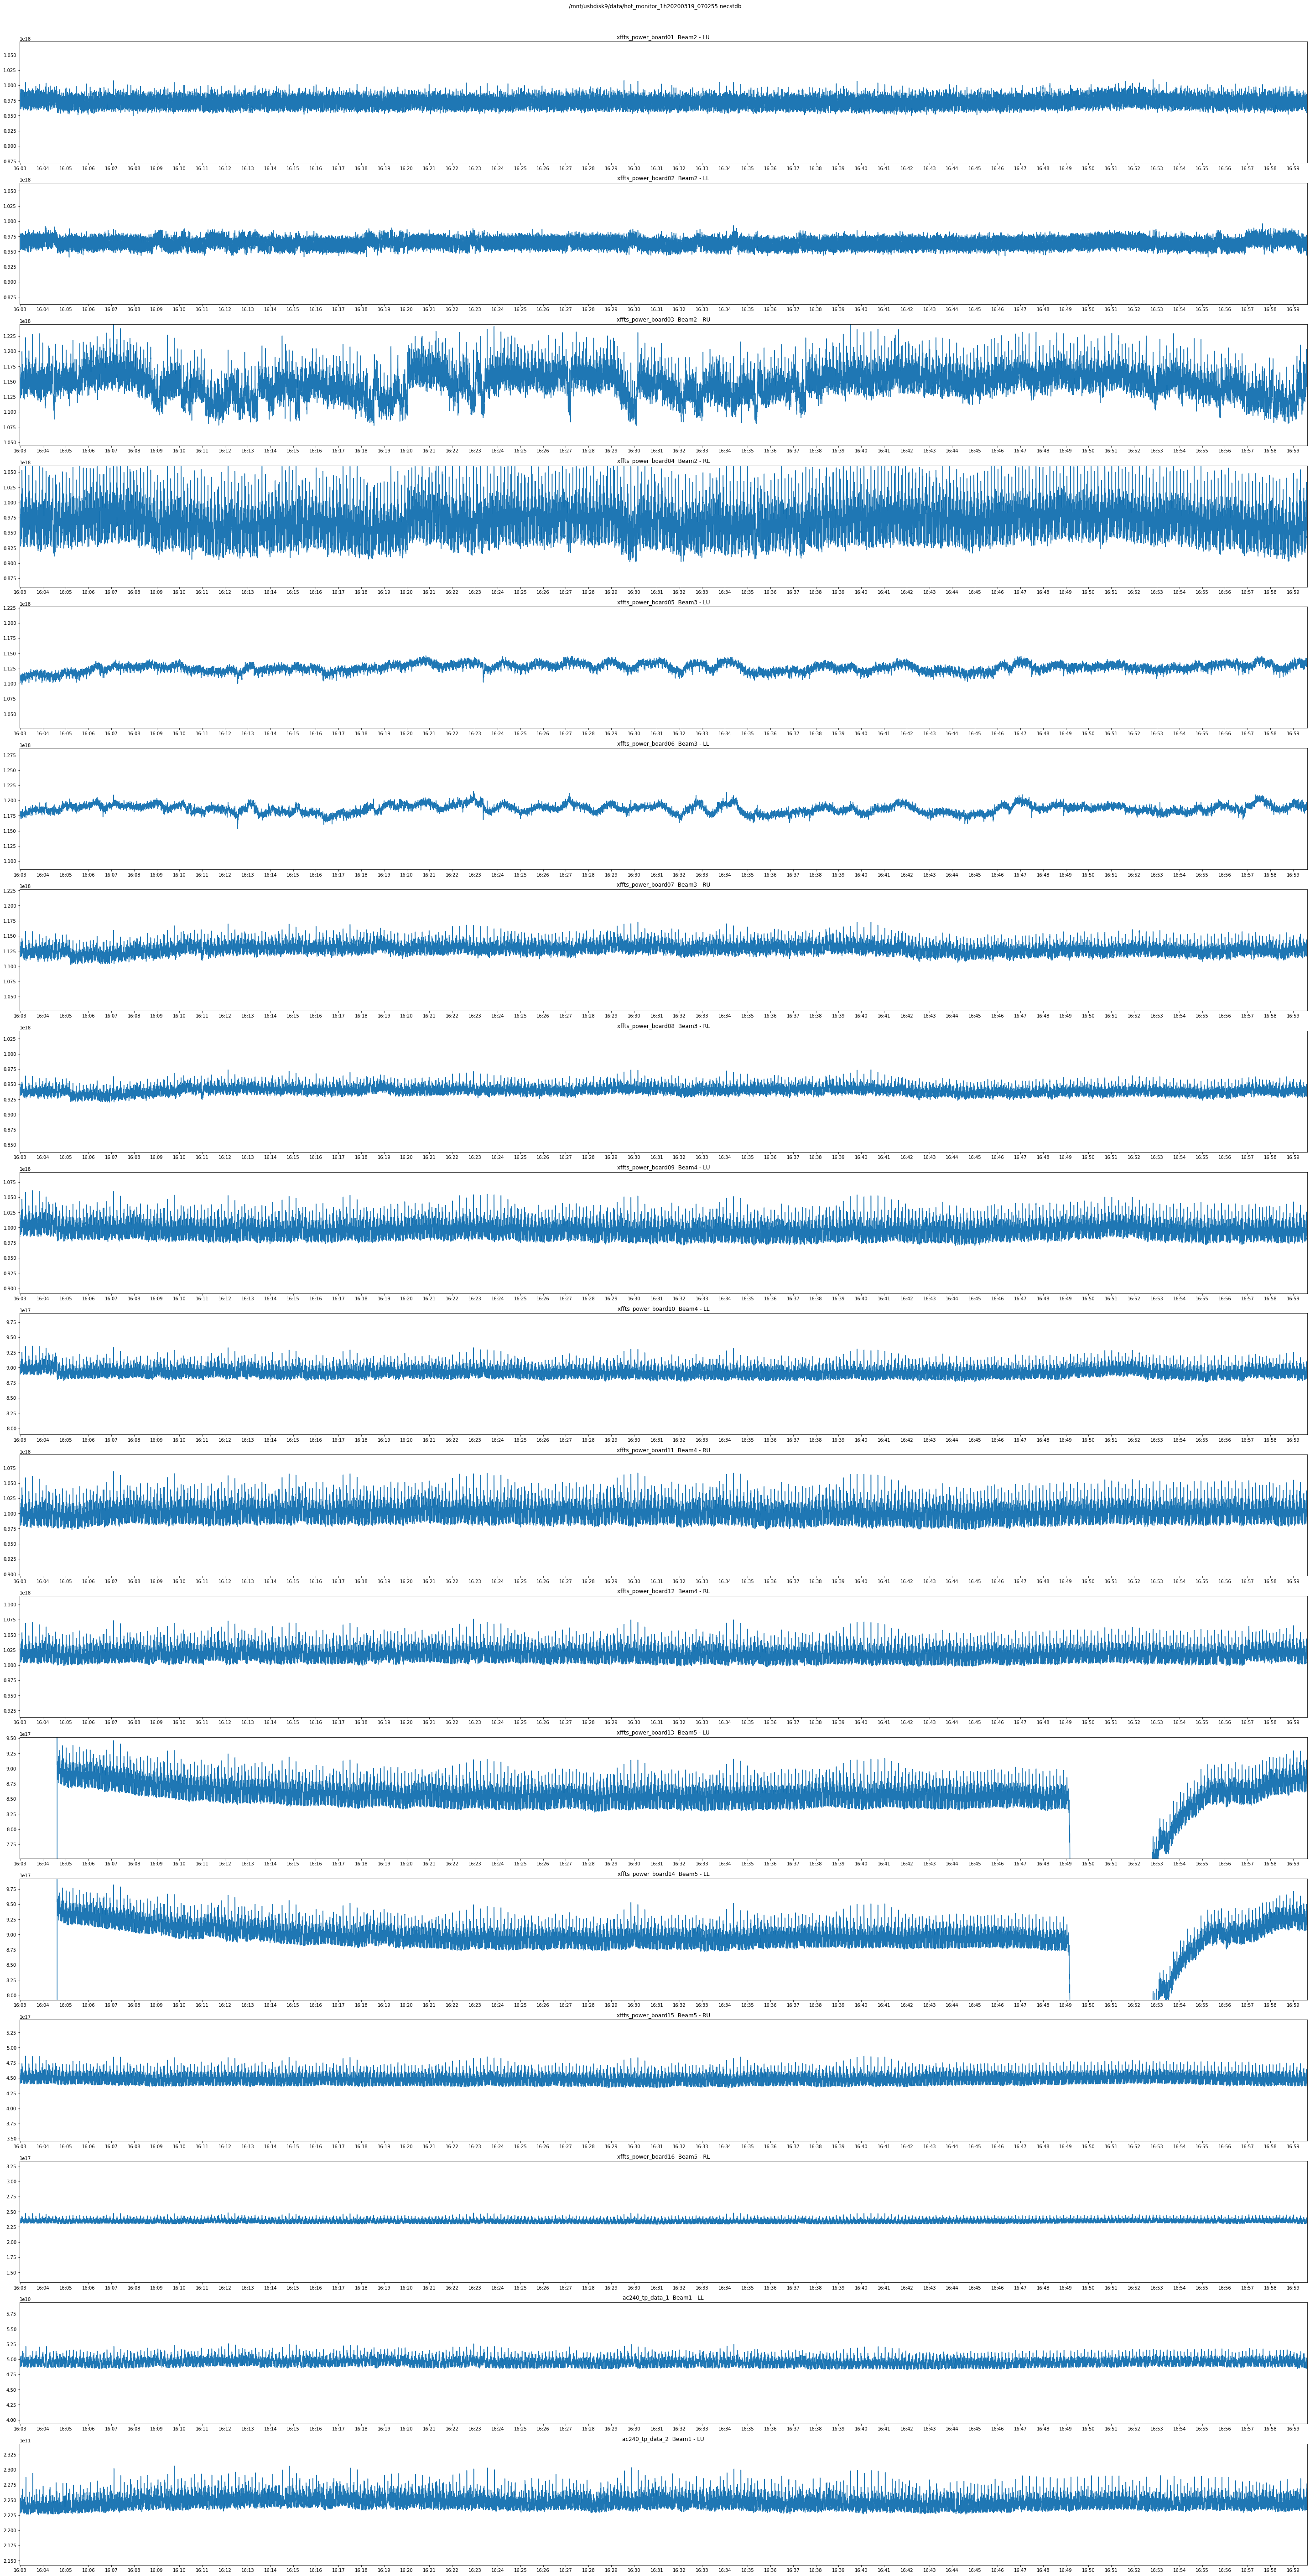

In [11]:
#グラフ作成(全時間)

mainfig = plt.figure(figsize=(40,80))

ax_list = [mainfig.add_subplot(18,1,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]


for ax, data_100g, num_100g in zip(ax_list, data_100g_list, num_100g_list):
    timearray=[dt.datetime.fromtimestamp(ts) for ts in data_100g.coords["timestamp"].values]
    data_y = data_100g.values
    ax.plot(timearray , data_y)
    
    ax.set_xlim([dt.datetime(2020, 3, 19, 16, 2, 58) , dt.datetime(2020, 3, 19, 16, 59, 37)])
    ax.set_ylim([np.median(data_y) - 1e+17, np.median(data_y) + 1e+17])  
    ax.xaxis.set_major_locator(md.MinuteLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
    ax.set_title('xffts_power_board'+str(num_100g).zfill(2)+"  "+beamname['xffts_power_board'+str(num_100g).zfill(2)])
    
    
num_200g_list = [1,2]
    
for ax, data_200g, num_200g in zip(ax_list[16:], data_200g_list, num_200g_list):
    timearray=[dt.datetime.fromtimestamp(ts) for ts in data_200g.coords["timestamp"].values]
    ax.plot(timearray , data_200g.values)
    
    ax.set_xlim([dt.datetime(2020, 3, 19, 16, 2, 58) , dt.datetime(2020, 3, 19, 16, 59, 37)])
    ax.set_ylim([np.median(data_200g.values) - 0.1e+11, np.median(data_200g.values) + 0.1e+11])
    ax.xaxis.set_major_locator(md.MinuteLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
    ax.set_title('ac240_tp_data_'+str(num_200g)+"  "+beamname['ac240_tp_data_'+str(num_200g)])

mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.97]) #タイトル , subplotsの調整

In [252]:
#個別にxarrayに変換する関数

def necst2xarray(file_num):
    filename='xffts_power_board'+str(file_num).zfill(2)
    dataTuple = n.open_table(filename).read() #tuple
    dataArray = np.array(dataTuple) #ndarray
    #xarray
    dataXarray=xr.DataArray(dataArray.T[2],dims=['timestamp'],coords={'timestamp':dataArray.T[0]},name='tpower'+str(file_num).zfill(2))
    return dataXarray

In [11]:
#0.1秒間隔で線形補間
#100GHz

data_new_100g_list=[]
for data in data_100g_list:
    t_array = data.coords["timestamp"].values
    data_array = data.values
    
    # 補間用の時刻列作成
    t_count = t_array[0]
    t_new_list = []
    while t_count <=t_array[-1]:
        t_new_list.append(t_count)
        t_count += 0.1
        
    # 方法2: scipy で補間
    # 補間方法選択
    # kind = "linear", "nearest", "zero", "slinear", "quadratic", "cubic", "previous", "next"
    kind = "linear"
    f = interp1d(t_array, data_array, kind=kind)
    data_scipy = f(t_new_list)
    
    dataXarray = xr.DataArray(data_scipy, dims=['timestamp'], coords={'timestamp':t_new_list}, name=data.name)
    data_new_100g_list.append(dataXarray)

In [12]:
#0.1秒間隔で線形補間
#200GHz

data_new_200g_list=[]
for data in data_200g_list:
    t_array = data.coords["timestamp"].values
    data_array = data.values
    
    # 補間用の時刻列作成
    t_count = t_array[0]
    t_new_list = []
    while t_count <=t_array[-1]:
        t_new_list.append(t_count)
        t_count += 0.1
        
    # 方法2: scipy で補間
    # 補間方法選択
    # kind = "linear", "nearest", "zero", "slinear", "quadratic", "cubic", "previous", "next"
    kind = "linear"
    f = interp1d(t_array, data_array, kind=kind)
    data_scipy = f(t_new_list)
    
    dataXarray = xr.DataArray(data_scipy, dims=['timestamp'], coords={'timestamp':t_new_list}, name=data.name)
    data_new_200g_list.append(dataXarray)

In [13]:
#xarray　timestampを時間に変える 100GHz
data_100g_vs_time=[]
for data_100g in data_new_100g_list:
    
    timearray=[dt.datetime.fromtimestamp(ts) for ts in data_100g.coords["timestamp"].values]
    dataXarray = xr.DataArray(data_100g.values, dims=['time'], coords={'time':timearray}, name=data_100g.name)
    data_100g_vs_time.append(dataXarray)

In [14]:
#xarray　timestampを時間に変える 200GHz
data_200g_vs_time=[]
for data_200g in data_new_200g_list:
    
    timearray=[dt.datetime.fromtimestamp(ts) for ts in data_200g.coords["timestamp"].values]
    dataXarray = xr.DataArray(data_200g.values, dims=['time'], coords={'time':timearray}, name=data_200g.name)
    data_200g_vs_time.append(dataXarray)

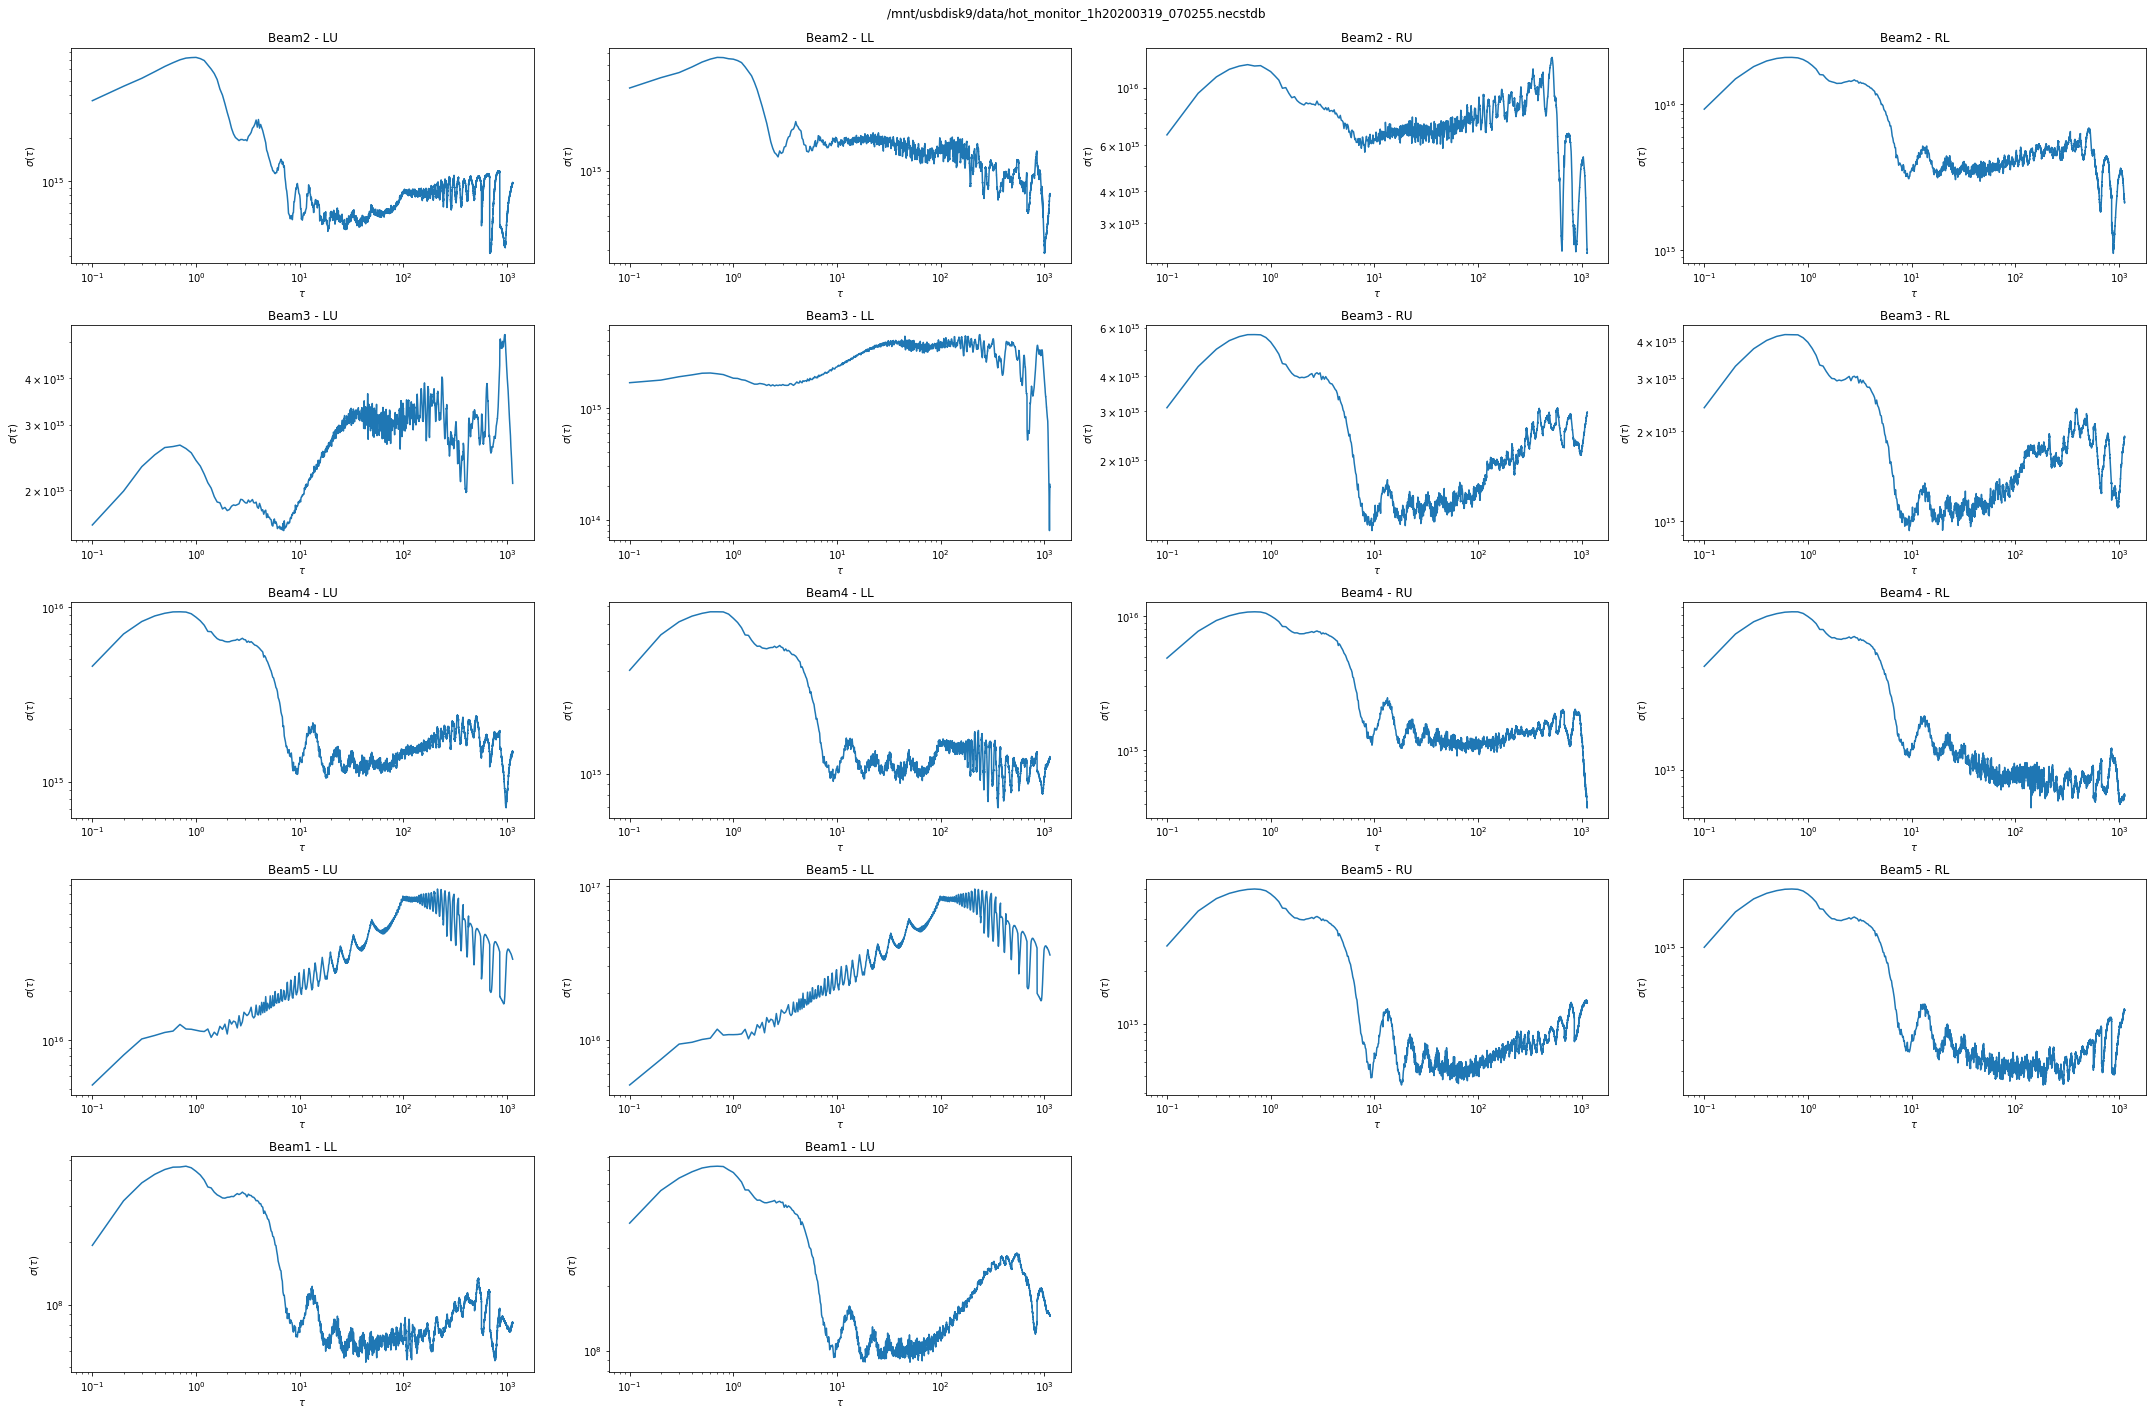

In [17]:
#アラン分散を計算+plot allantools

mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]

r=10 #10Hz サンプリング周期


for ax, data_100g, num_100g in zip(ax_list, data_new_100g_list, num_100g_list):
    
    (t2, ad, ade, adn) = allantools.adev(data_100g, rate=r, data_type="freq", taus="all")
    
    ax.plot(t2, ad)
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\sigma(\tau)$")
    
num_200g_list = [1,2]
    
for ax, data_200g, num_200g in zip(ax_list[16:], data_new_200g_list, num_200g_list):
    
    (t2, ad, ade, adn) = allantools.adev(data_200g, rate=r, data_type="freq", taus="all")
    
    ax.plot(t2, ad)
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\sigma(\tau)$")    
    
mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.97]) #タイトル , subplotsの調整

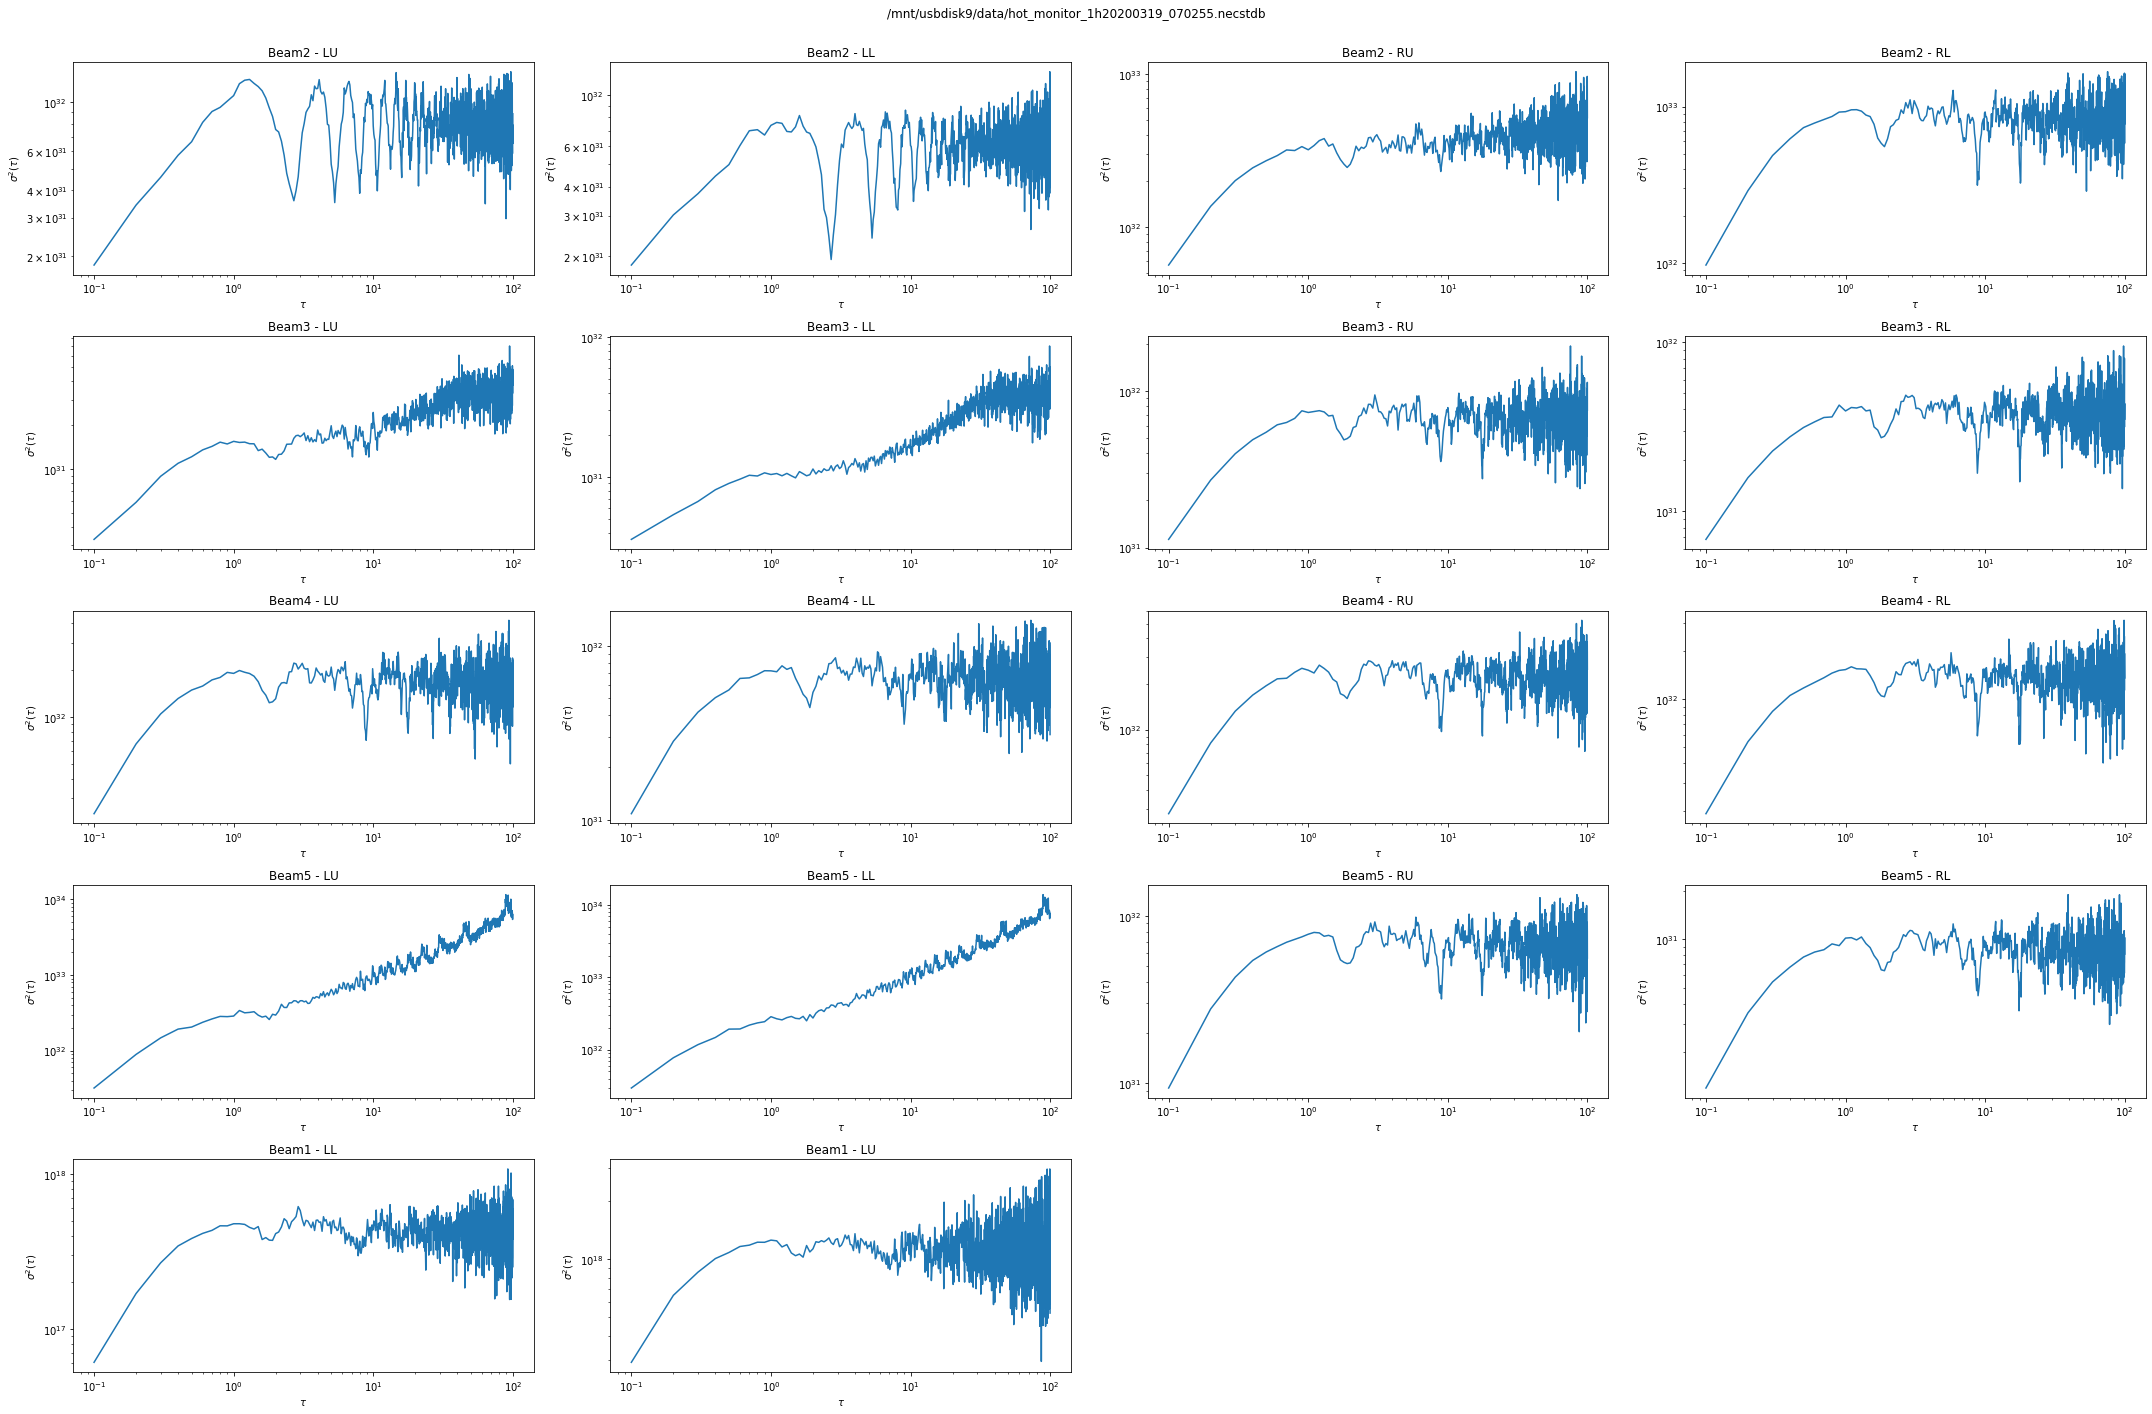

In [50]:
#アラン分散を計算+plot

mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]


for ax, data_100g, num_100g in zip(ax_list, data_100g_list, num_100g_list):
    
    avar_list=[]
    for i in range(1,1000):
        diff = np.diff(data_100g[::i])
        square = np.square(diff)
        avar = square.mean()/2
        avar_list.append(avar)
    
    x_ax = [0.1*m for m in range(1,len(avar_list)+1)]
    
    ax.plot(x_ax, avar_list)
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\sigma^2(\tau)$")
    
num_200g_list = [1,2]
    
for ax, data_200g, num_200g in zip(ax_list[16:], data_200g_list, num_200g_list):
    
    avar_list=[]
    for i in range(1,1000):
        diff = np.diff(data_200g[::i])
        square = np.square(diff)
        avar = square.mean()/2
        avar_list.append(avar)
    
    x_ax = [0.1*m for m in range(1,len(avar_list)+1)]
    
    ax.plot(x_ax, avar_list)
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\sigma^2(\tau)$")    
    
mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.96]) #タイトル , subplotsの調整

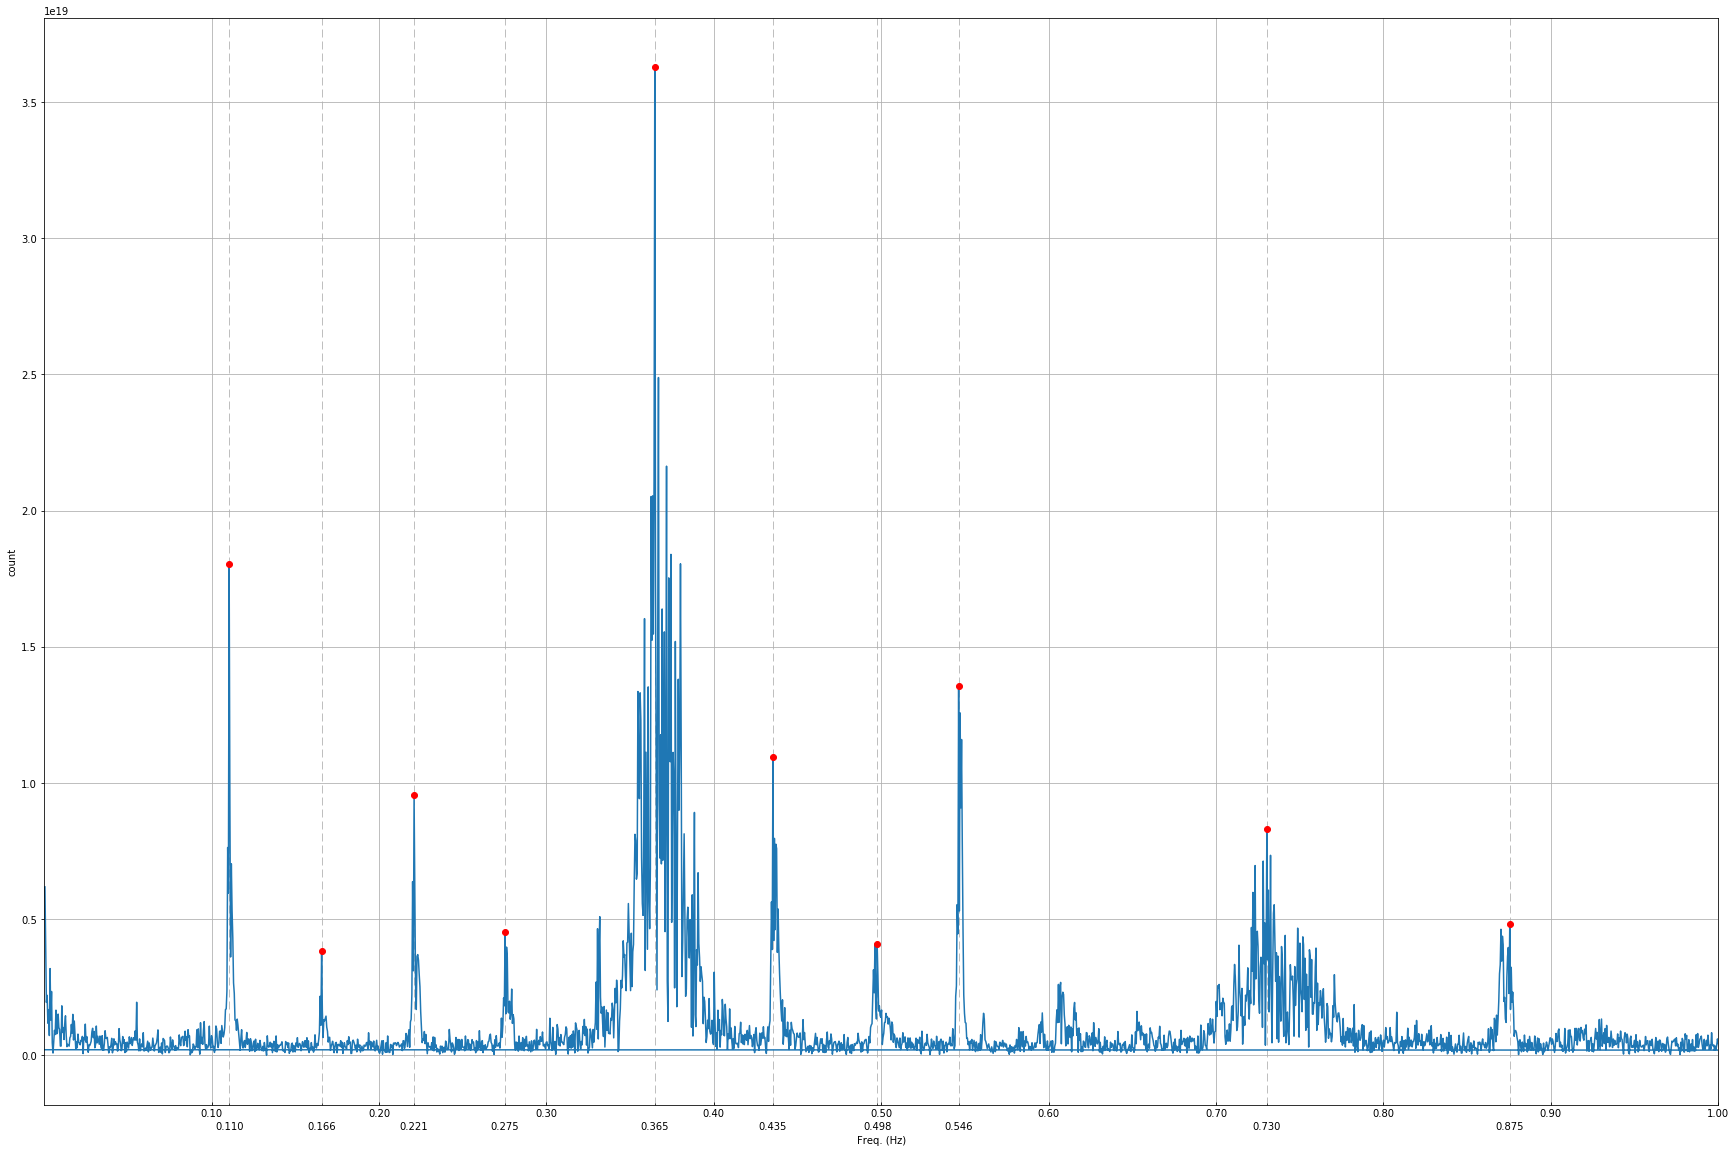

In [139]:
mainfig = plt.figure(figsize=(30,20))

ax = mainfig.add_subplot(1,1,1)

data = data_100g_vs_time[0].sel(time=slice("2020-03-19T16:10:00","2020-03-19T16:48:00"))
fft = abs(np.fft.fft(data))
freq = np.fft.fftfreq(len(data), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期

ax.plot(freq[1:], fft[1:])#abs:配列の絶対値
ax.set_xlabel("Freq. (Hz)")
ax.set_ylabel("count")

#ax.set_ylim(1e14, 1e20) #<=要編集
ax.set_xlim(0, 1)

d_xarray = xr.DataArray(fft, dims=['freq'], coords={'freq':freq})
d_xarray_slice = d_xarray.sel(freq=slice(0,1))
maxid = signal.argrelmax(d_xarray_slice.values, order=100) #ピーク
d_sort_xarray = d_xarray_slice[maxid].sortby(d_xarray_slice[maxid]) #sort

x_sort=d_sort_xarray[-1:-11:-1].coords["freq"]
y_sort=d_sort_xarray[-1:-11:-1]

x_ti=np.arange(0.1,1.1,0.1) #major
#x_ti_add = np.append(x_ti,d_sort_xarray[-1:-8:-1].coords["freq"])
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(x_ti))
ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(x_sort))

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.2f}'))
ax.xaxis.set_minor_formatter(mpl.ticker.StrMethodFormatter('{x:.3f}'))

ax.plot(x_sort,y_sort,'ro',label='ピーク値')

ax.grid()
ax.grid(axis='x', which='minor', ls='dashed',dashes=[10,5])
ax.tick_params('x',which='minor',pad=17)


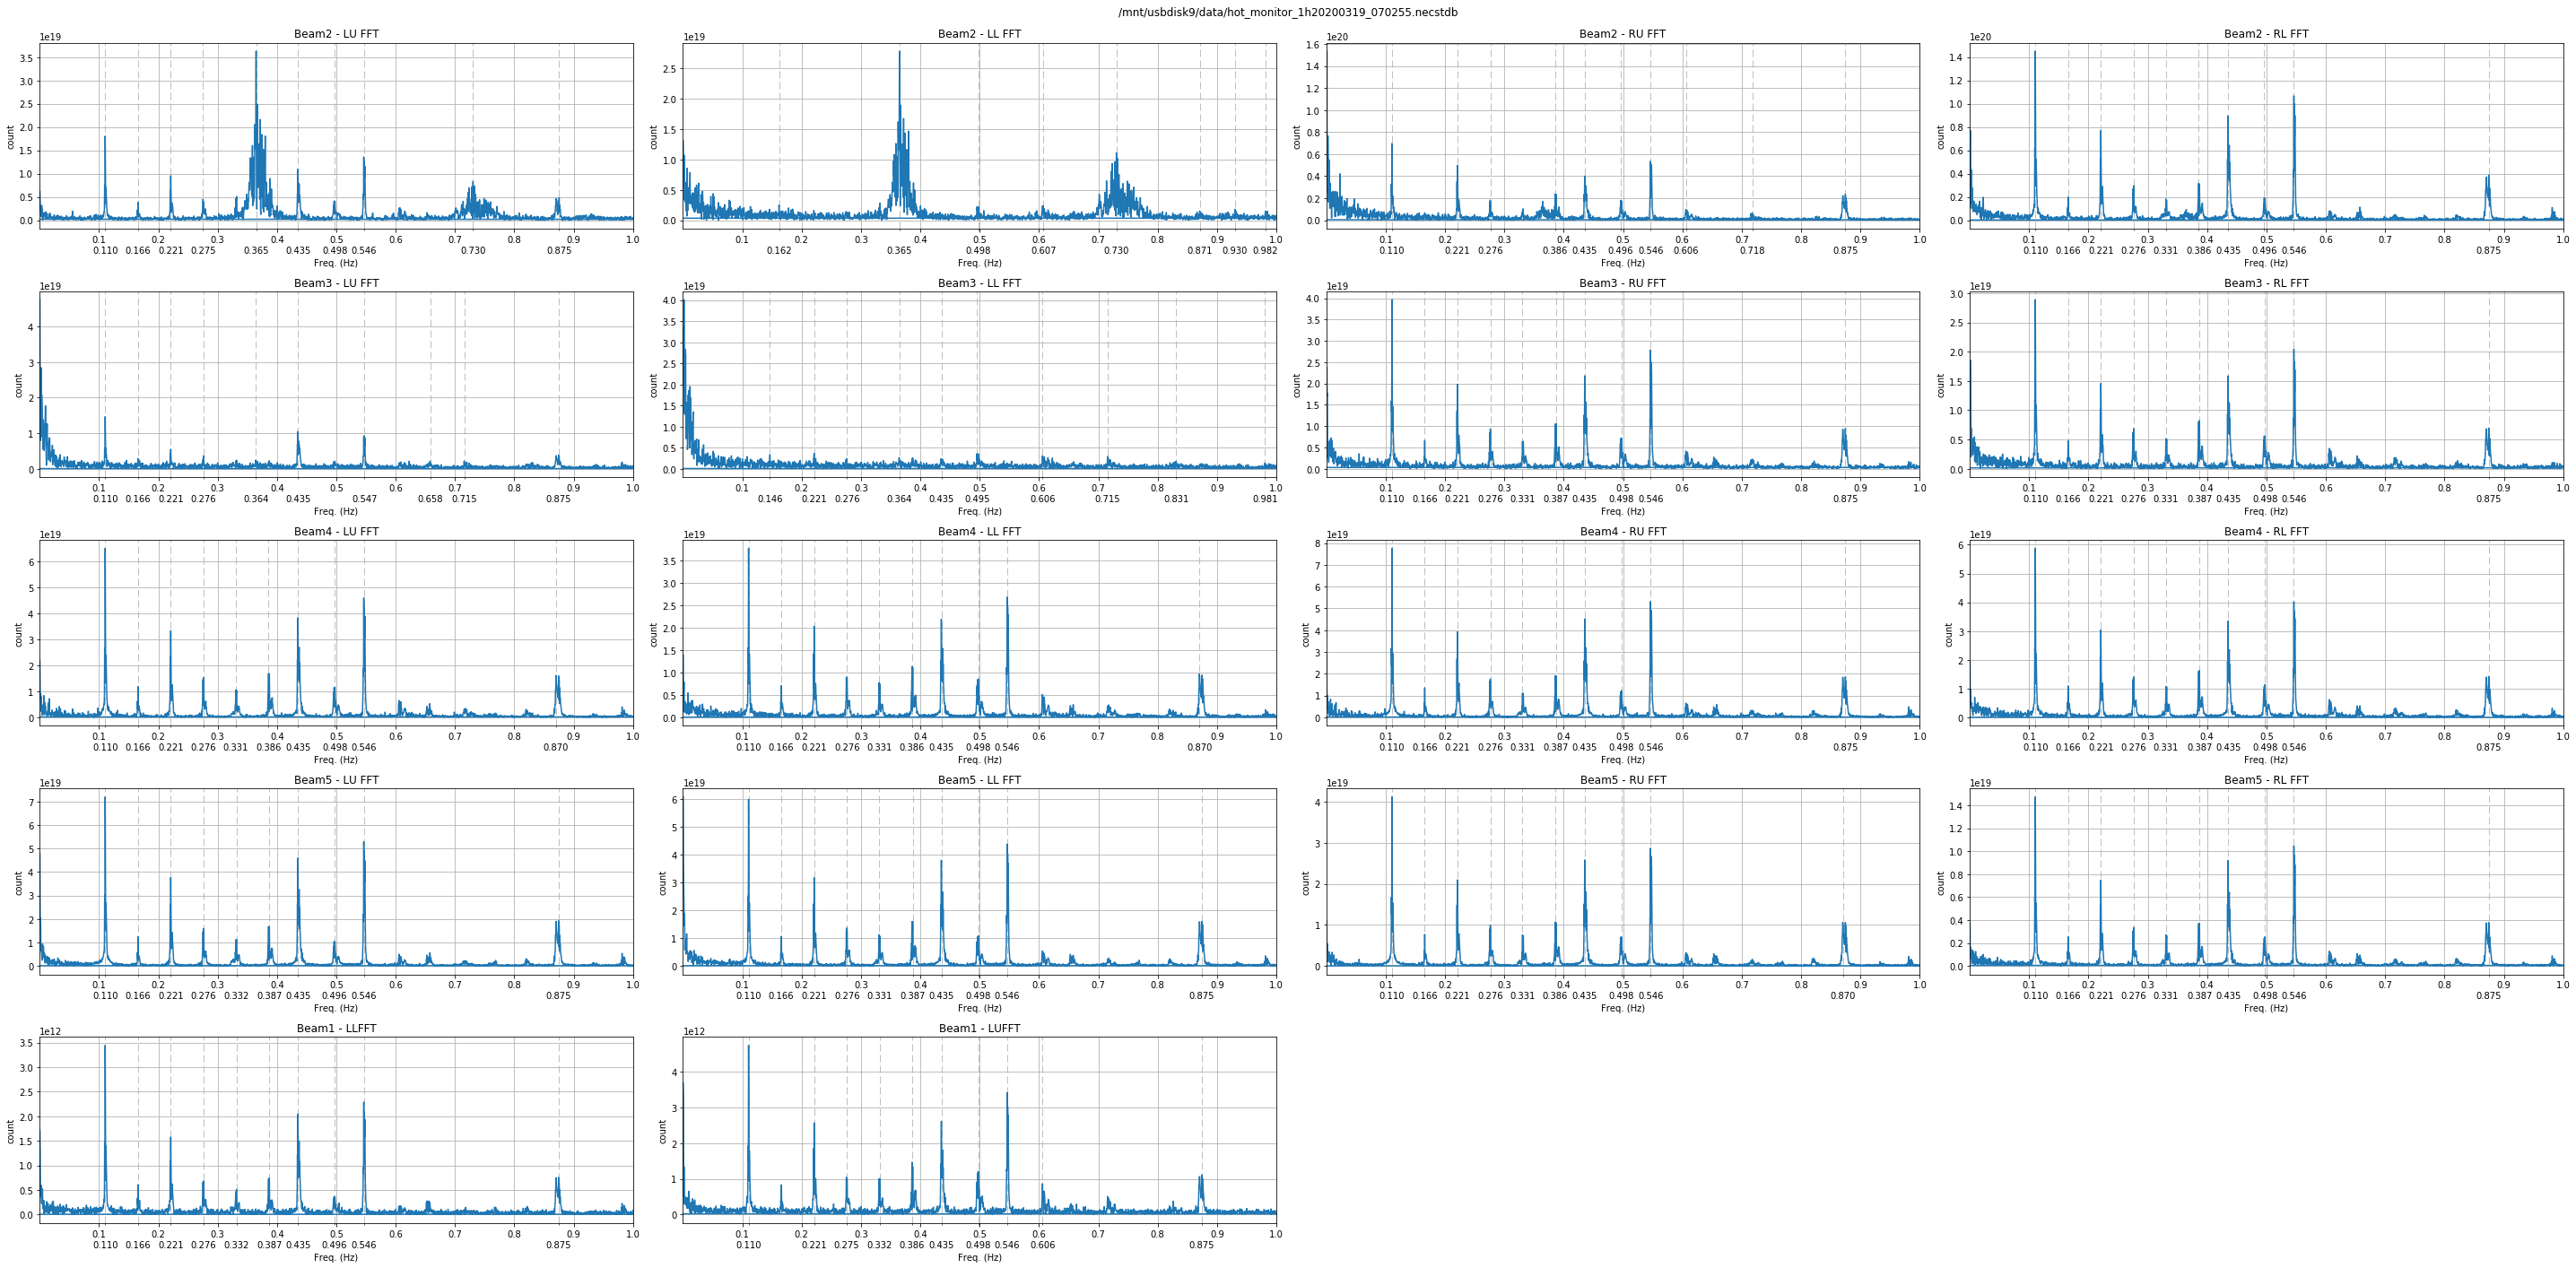

In [15]:
#fft 線形補間済み　ピークに補助目盛

mainfig = plt.figure(figsize=(40,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]

for data_100g, ax, num_100g in zip(data_100g_vs_time, ax_list, num_100g_list):
    data = data_100g.sel(time=slice("2020-03-19T16:10:00","2020-03-19T16:48:00"))
    
    fft = abs(np.fft.fft(data))
    freq = np.fft.fftfreq(len(data), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期
    
    ax.plot(freq[1:], fft[1:])#abs:配列の絶対値
    ax.set_xlabel("Freq. (Hz)")
    ax.set_ylabel("count")
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)]+' FFT')
    
    d_xarray = xr.DataArray(fft, dims=['freq'], coords={'freq':freq})
    d_xarray_slice = d_xarray.sel(freq=slice(0,1))#slice
    maxid = signal.argrelmax(d_xarray_slice.values, order=100) #ピーク
    d_sort_xarray = d_xarray_slice[maxid].sortby(d_xarray_slice[maxid]) #ピークの抽出・sort
    
    x_sort = d_sort_xarray[-1:-11:-1].coords["freq"]#大きい順に10個取り出す
    y_sort = d_sort_xarray[-1:-11:-1]
    #ax.plot(x_sort,y_sort,'ro',label='ピーク値')
    
    
    x_ti=np.arange(0.1,1.1,0.1) #major目盛
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(x_ti))
    ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(x_sort))
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
    ax.xaxis.set_minor_formatter(mpl.ticker.StrMethodFormatter('{x:.3f}'))
    
    ax.grid()
    ax.grid(axis='x', which='minor', ls='dashed',dashes=[10,5])
    ax.tick_params('x',which='minor',pad=17)
    ax.set_xlim(0, 1)
    
    
num_200g_list = [1,2]
for data_200g, ax, num_200g in zip(data_200g_vs_time, ax_list[16:], num_200g_list):
    data = data_200g.sel(time=slice("2020-03-19T16:10:00","2020-03-19T16:48:00"))
    
    fft = abs(np.fft.fft(data))
    freq = np.fft.fftfreq(len(data), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期
    
    ax.plot(freq[1:], fft[1:])#abs:配列の絶対値
    ax.set_xlabel("Freq. (Hz)")
    ax.set_ylabel("count")
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)] + 'FFT')
    
    d_xarray = xr.DataArray(fft, dims=['freq'], coords={'freq':freq})
    d_xarray_slice = d_xarray.sel(freq=slice(0,1))#slice
    maxid = signal.argrelmax(d_xarray_slice.values, order=100) #ピーク
    d_sort_xarray = d_xarray_slice[maxid].sortby(d_xarray_slice[maxid]) #ピークの抽出・sort
    
    x_sort = d_sort_xarray[-1:-11:-1].coords["freq"]#大きい順に10個取り出す
    y_sort = d_sort_xarray[-1:-11:-1]
    #ax.plot(x_sort,y_sort,'ro',label='ピーク値')
    
    
    x_ti=np.arange(0.1,1.1,0.1) #major目盛
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(x_ti))
    ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(x_sort))
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.1f}'))
    ax.xaxis.set_minor_formatter(mpl.ticker.StrMethodFormatter('{x:.3f}'))
    
    ax.grid()
    ax.grid(axis='x', which='minor', ls='dashed',dashes=[10,5])
    ax.tick_params('x',which='minor',pad=17)
    ax.set_xlim(0, 1)

    
mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.97]) #タイトル , subplotsの調整

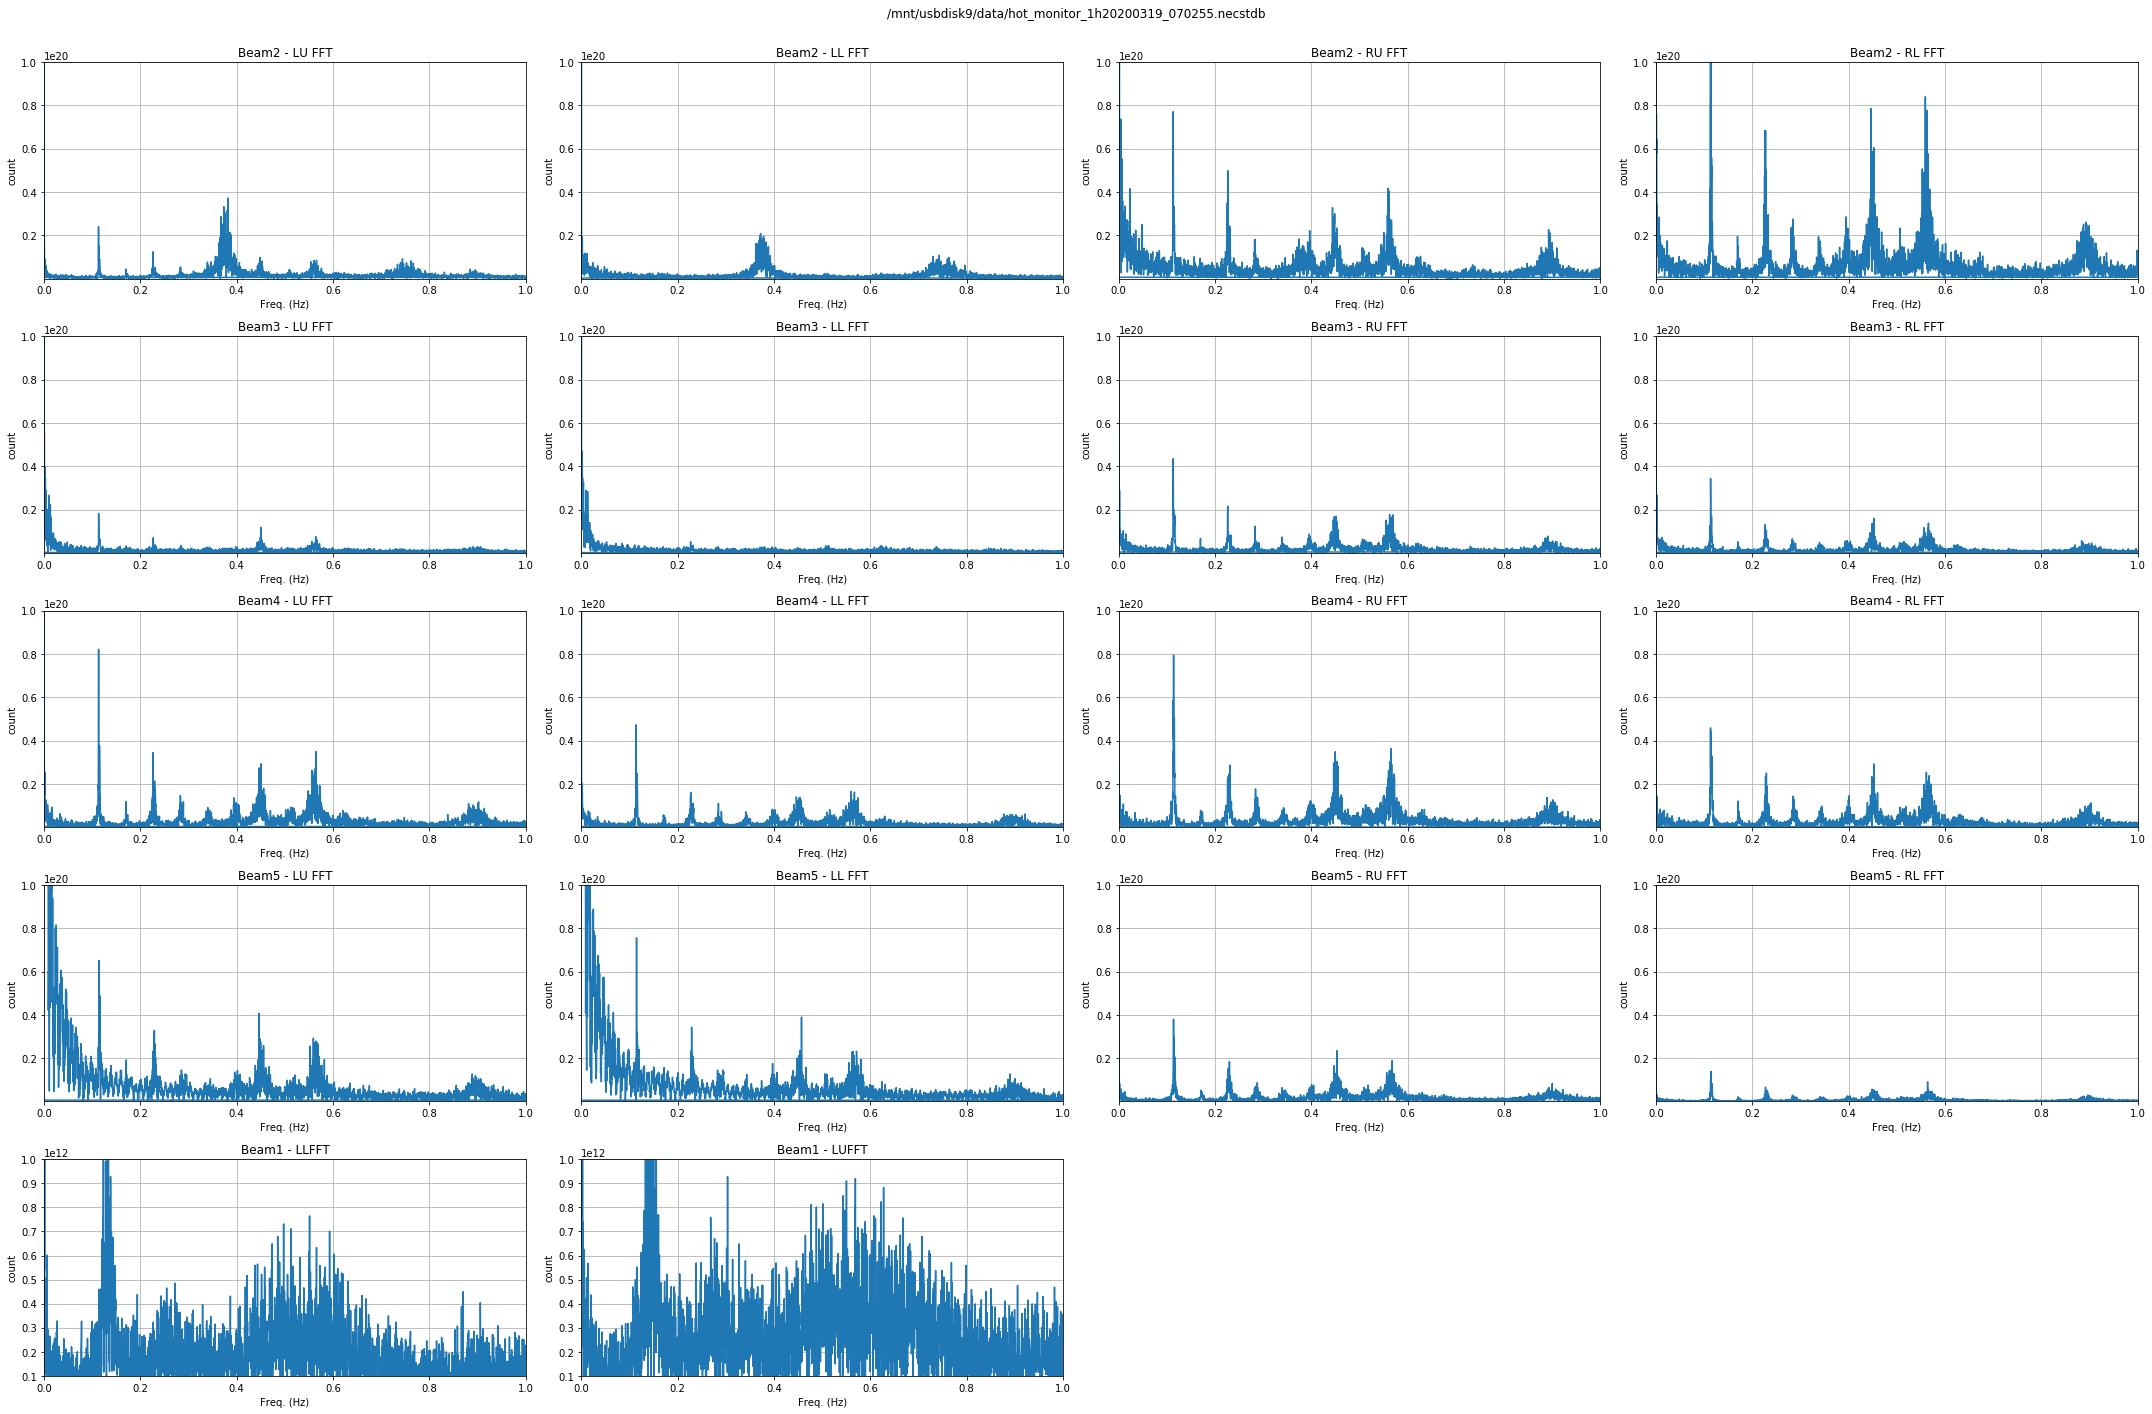

In [43]:
mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]

for data_100g, ax, num_100g in zip(data_100g_list, ax_list, num_100g_list):
    freq = np.fft.fftfreq(len(data_100g), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期
    ax.plot(freq, abs(np.fft.fft(data_100g)))#abs:配列の絶対値
    ax.set_xlabel("Freq. (Hz)")
    ax.set_ylabel("count")
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)]+' FFT')
    ax.grid()
    ax.set_ylim(1e14, 1e20) #<=要編集
    ax.set_xlim(0, 1)
    
    
num_200g_list = [1,2]
for data_200g, ax, num_200g in zip(data_200g_list, ax_list[16:], num_200g_list):
    freq = np.fft.fftfreq(len(data_200g), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期
    ax.plot(freq, abs(np.fft.fft(data_200g)))#abs:配列の絶対値
    ax.set_xlabel("Freq. (Hz)")
    ax.set_ylabel("count")
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)] + 'FFT')
    ax.grid()
    ax.set_ylim(1e11, 1e12) #<=要編集
    ax.set_xlim(0, 1)

    
mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.96]) #タイトル , subplotsの調整

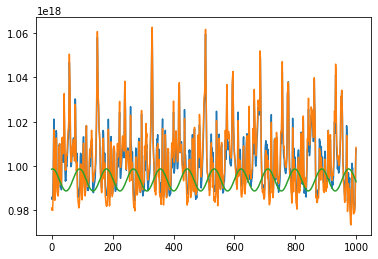

In [26]:
N = len(data_100g_list[8])
F = np.fft.fft(data_100g_list[8])
abs_list = np.abs(F)[:int(N/2)+1]
max_num = np.where(abs_list==np.sort(abs_list)[-2])
freq = np.fft.fftfreq(N,d=0.1)[max_num]
F_max = F[max_num]
a = np.abs(F_max/(N/2))
angle = np.angle(F_max)

t=np.arange(N)
cos = a * np.cos(2*np.pi*freq*t/10+angle) #+ 9.937690508459494e+17
plt.plot(data_100g_list[8][:1000])
plt.plot(data_100g_list[8][:1000]-cos[:1000])
cos_a = a * np.cos(2*np.pi*freq*t/10+angle) + 9.937690508459494e+17
plt.plot(cos_a[:1000])

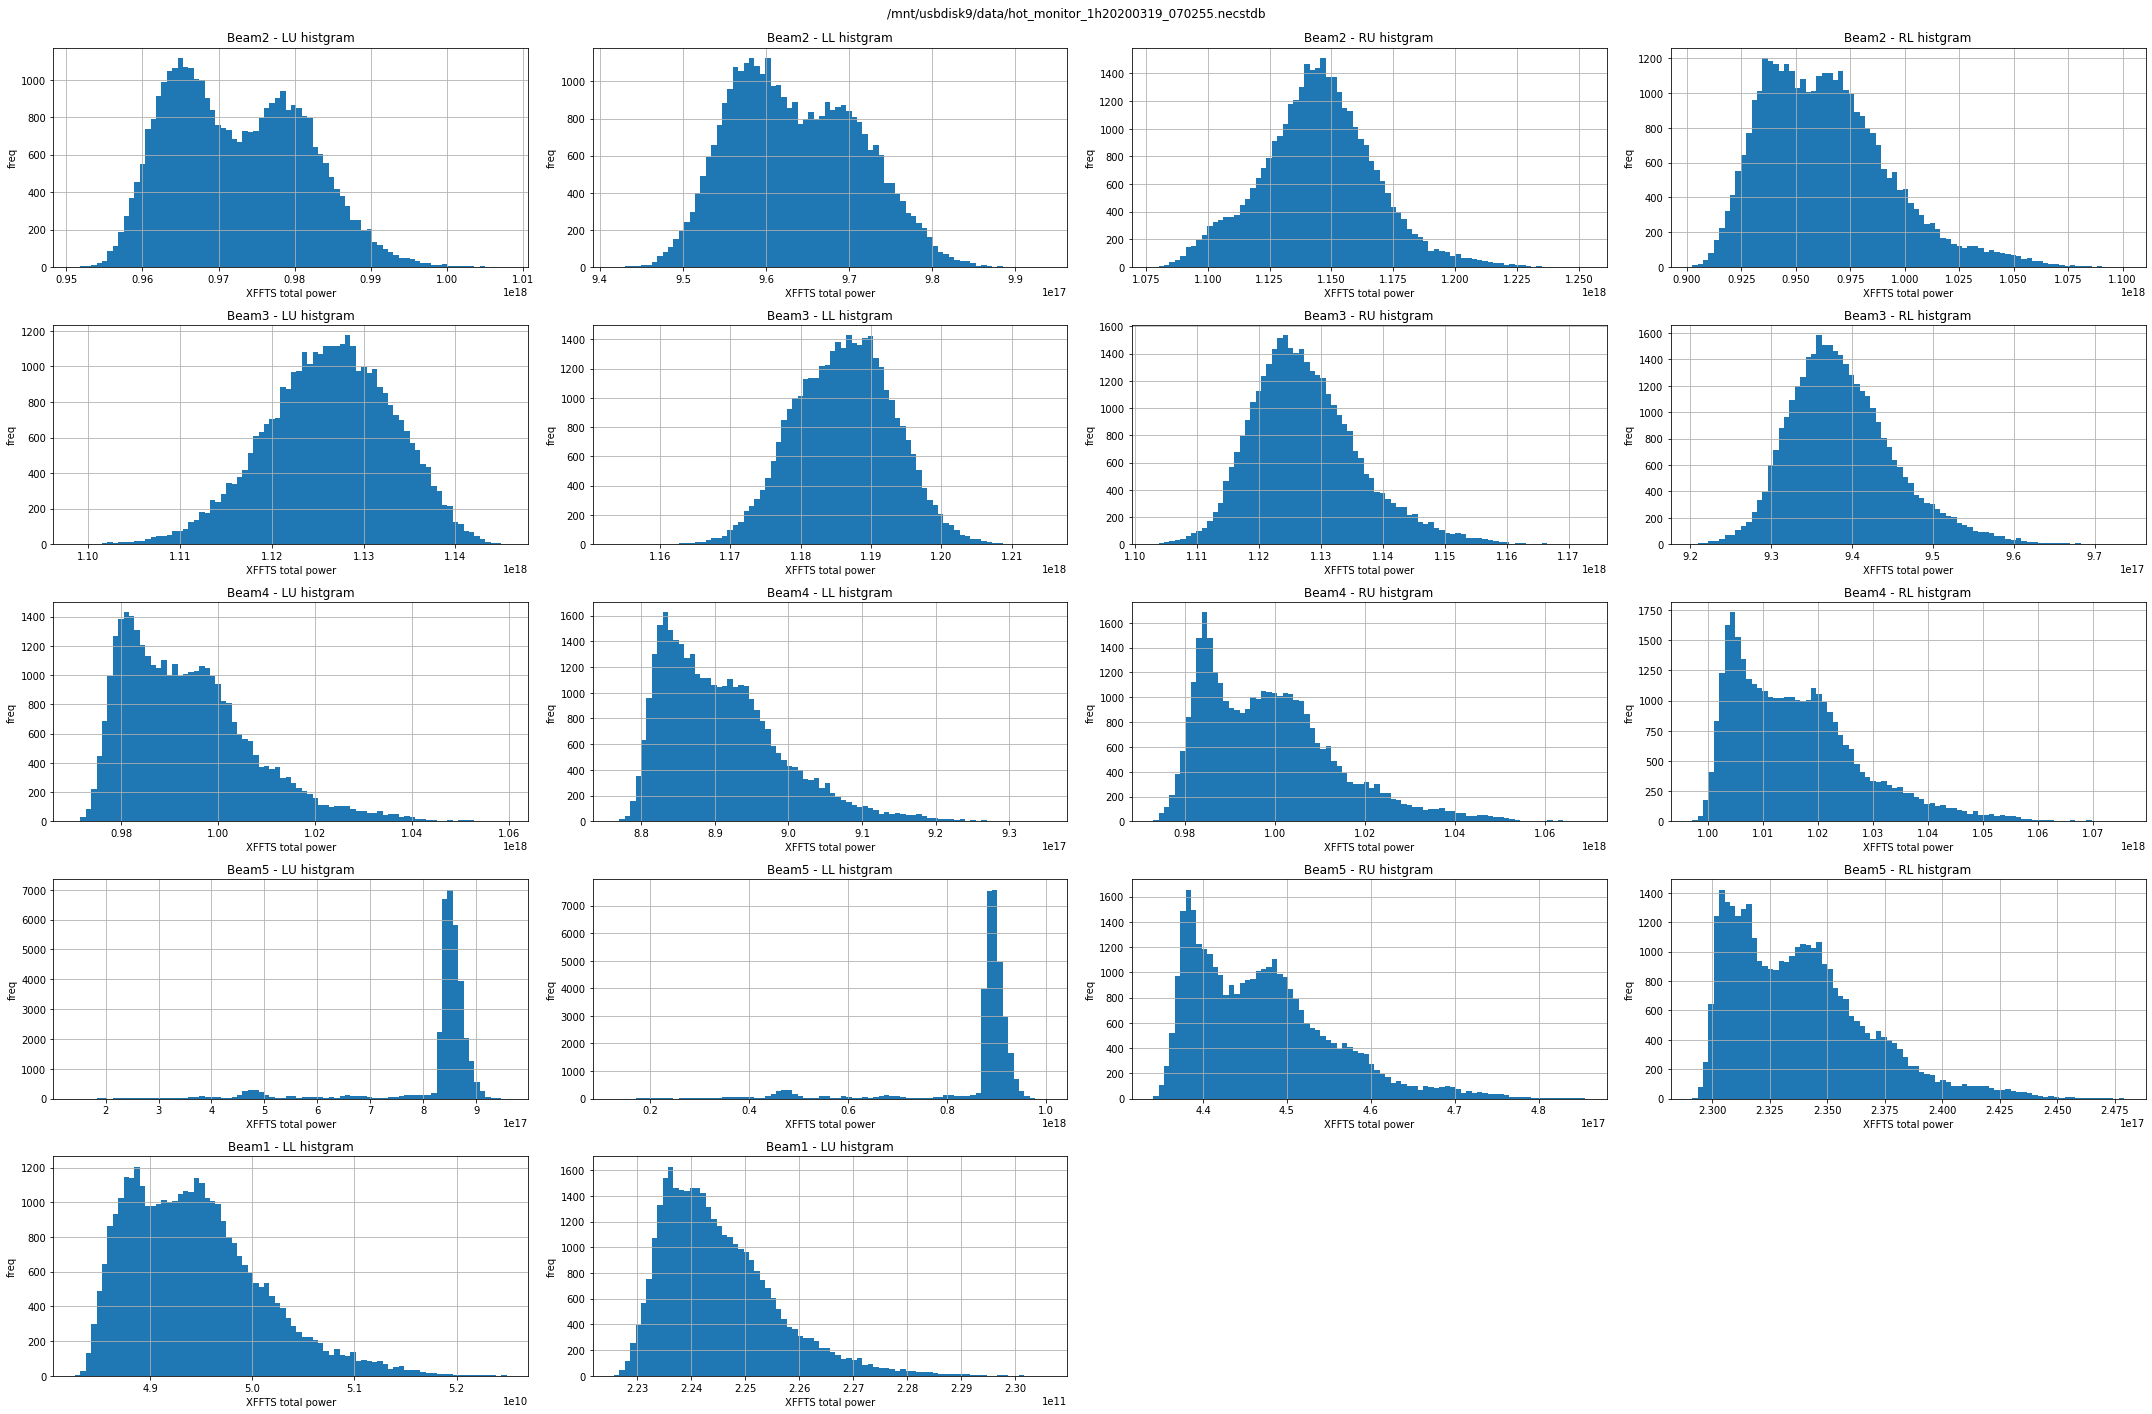

In [16]:
#ヒストグラム作成

mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]


for ax, data_100g, num_100g in zip(ax_list, data_100g_vs_time, num_100g_list):

    ax.hist(data_100g, bins=80)
    
    ax.grid()
    ax.set_xlabel("XFFTS total power")
    ax.set_ylabel("freq")
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)]+' histgram')
    
    
num_200g_list = [1,2]
    
for ax, data_200g, num_200g in zip(ax_list[16:], data_200g_vs_time, num_200g_list):

    ax.hist(data_200g, bins=80)
    ax.grid()
    ax.set_xlabel("XFFTS total power")
    ax.set_ylabel("freq")
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)]+' histgram')

mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.97]) #タイトル , subplotsの調整

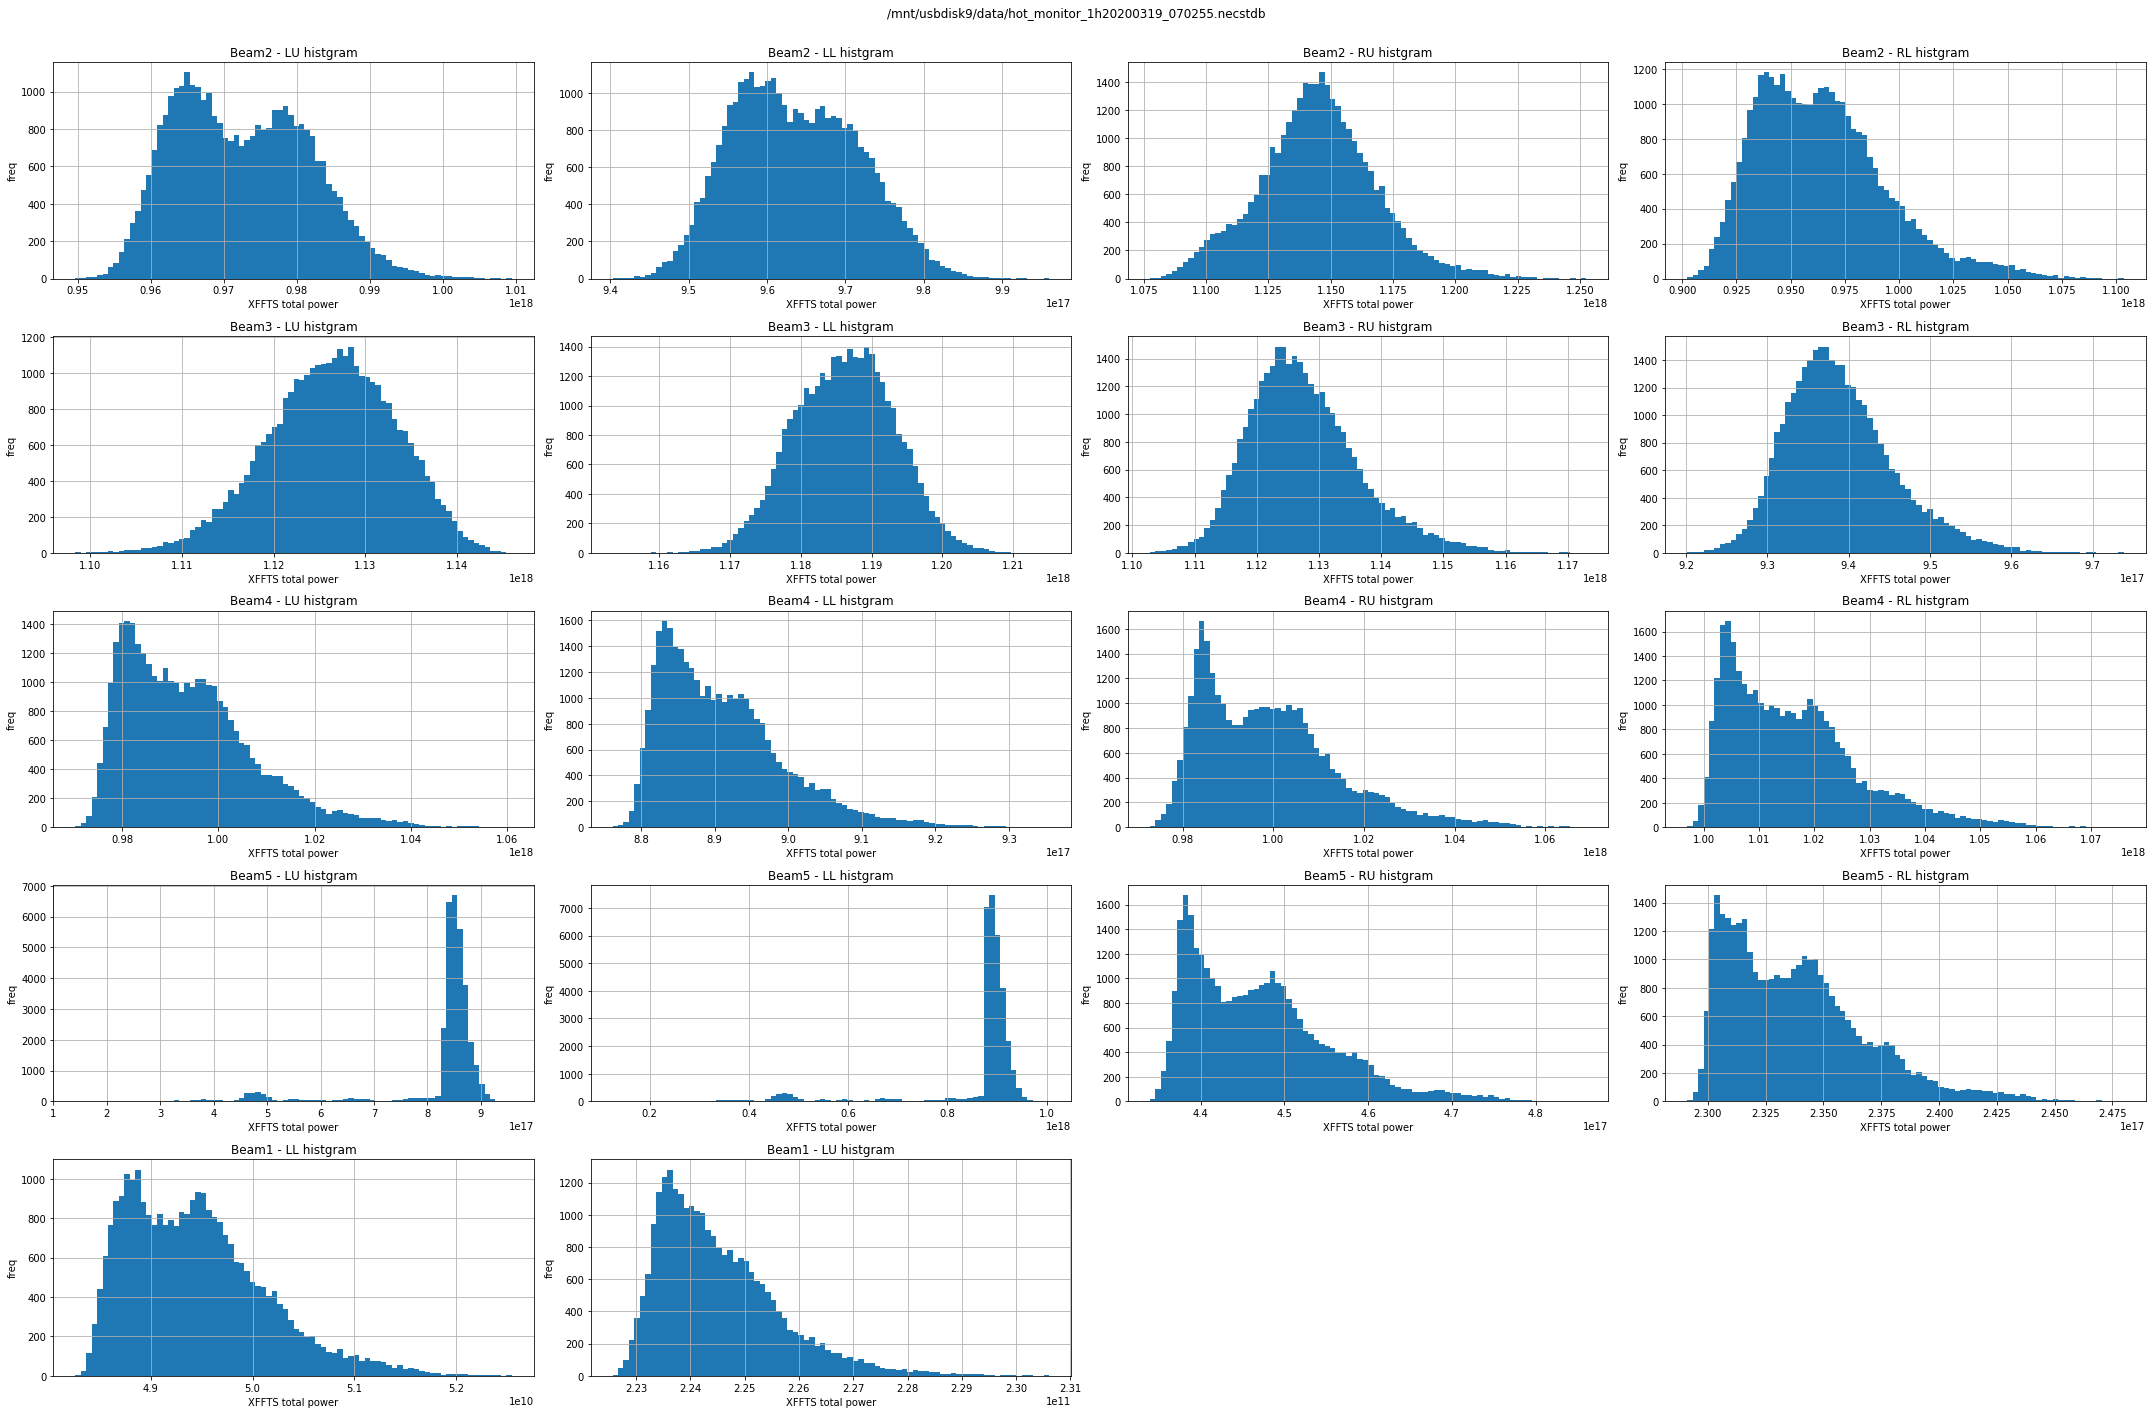

In [85]:
#ヒストグラム作成

mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]


for ax, data_100g, num_100g in zip(ax_list, data_100g_list, num_100g_list):

    ax.hist(data_100g, bins=80)
    
    ax.grid()
    ax.set_xlabel("XFFTS total power")
    ax.set_ylabel("freq")
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)]+' histgram')
    
    
num_200g_list = [1,2]
    
for ax, data_200g, num_200g in zip(ax_list[16:], data_200g_list, num_200g_list):

    ax.hist(data_200g, bins=80)
    ax.grid()
    ax.set_xlabel("XFFTS total power")
    ax.set_ylabel("freq")
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)]+' histgram')

mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.97]) #タイトル , subplotsの調整

In [150]:
#アラン分散 MVAR
#(1) 総数N個のデータをm個(m=1,2,4,…,N/2)ずつのグループに分ける. グループの数はK=N/m個となる. 一つのグループの時間はτ=mΔtである.
#(2) 各グループ内のデータの平均値を求める. k番目のグループの平均値をxk(τ)とする.
#(3) k番目のグループの平均値xk(τ)と,(k+1)番目のグループの平均値x(k+1)(τ)の差を求める. 平均値の差の個数は(k-1)個となる.
#(4) 平均の差の二乗の平均値を求める. この値の1/2が, 時間τに対するアラン分散である.
#(5) 以上の計算をグループ内のデータ数m=1,2,4,…,N/2に対して行う.

data=data_100g_list[3][-2**15:]
N=2**15
m_list = [2**i for i in range(15)]
allan_list=[]

for m in m_list:
    
    average_list = [data[i : i+int(m)].mean() for i in range(0, len(data), int(m))]
    print(len(average_list))
    subtraction = [average_list[i+1] - average_list[i] for i in range(0, len(average_list)-1)]
    print(len(subtraction))
    allan = np.square(subtraction).mean()/2
    print(allan)
    allan_list.append(allan)

32768
32767
9.713881273896787e+31
16384
16383
2.4280208971210084e+32
8192
8191
4.0771974030826914e+32
4096
4095
4.352986701584519e+32
2048
2047
2.0886770409122802e+32
1024
1023
1.978763109468132e+32
512
511
3.671063092695439e+31
256
255
2.8556538779780488e+31
128
127
1.1206474713670372e+31
64
63
1.0471252823232747e+31
32
31
1.5532412920201014e+31
16
15
2.1979750012969106e+31
8
7
3.652898546572417e+31
4
3
5.871210300186172e+30
2
1
1.361531545533441e+30


In [19]:
def cal_allan(data):

    
    m_list = [2**i for i in range(15)]
    allan_list=[]

    for m in m_list:

        average_list = [data[i : i+int(m)].mean() for i in range(0, len(data), int(m)) if m > 1]
        if average_list==[]:
            average_list=data
        print(type(average_list))
        subtraction = [average_list[i+1] - average_list[i] for i in range(0, len(average_list)-1)]
        print(len(subtraction))
        allan = np.square(subtraction).mean()/2
        print(allan)
        allan_list.append(allan)
    return allan_list


allan_100g_list=[]
for data_100g in data_100g_list:
    allan_100g_list.append(cal_allan(data_100g[-2**15:]))

<class 'xarray.core.dataarray.DataArray'>
32767
1.8257752366278358e+31
<class 'list'>
16383
2.3921498674239653e+31
<class 'list'>
8191
3.5613165752141136e+31
<class 'list'>
4095
5.235213805345531e+31
<class 'list'>
2047
2.415138236044046e+31
<class 'list'>
1023
4.534800150440641e+30
<class 'list'>
511
1.8268786307822364e+30
<class 'list'>
255
5.4667512325860025e+29
<class 'list'>
127
3.133850441437219e+29
<class 'list'>
63
3.987618672799805e+29
<class 'list'>
31
5.27965956404505e+29
<class 'list'>
15
8.543511638652903e+29
<class 'list'>
7
7.583049339856823e+29
<class 'list'>
3
1.3233182164235852e+30
<class 'list'>
1
6.483747088276199e+28
<class 'xarray.core.dataarray.DataArray'>
32767
1.8280221710986213e+31
<class 'list'>
16383
2.001335147560938e+31
<class 'list'>
8191
2.5384411107353264e+31
<class 'list'>
4095
3.1789558114054023e+31
<class 'list'>
2047
1.3866729503534506e+31
<class 'list'>
1023
2.3281919646460579e+30
<class 'list'>
511
2.55643873356751e+30
<class 'list'>
255
2.2857968

32767
2.9566120007757776e+31
<class 'list'>
16383
6.718493597653532e+31
<class 'list'>
8191
1.1134005787914362e+32
<class 'list'>
4095
1.1328988833140207e+32
<class 'list'>
2047
1.2024806431087004e+32
<class 'list'>
1023
1.94048381091663e+32
<class 'list'>
511
3.824513447559752e+32
<class 'list'>
255
8.113115297642952e+32
<class 'list'>
127
1.1010980094559812e+33
<class 'list'>
63
2.913668732611619e+33
<class 'list'>
31
6.943536640222493e+33
<class 'list'>
15
8.182986142054565e+33
<class 'list'>
7
4.3680725517359525e+33
<class 'list'>
3
1.5301812074911318e+33
<class 'list'>
1
2.9764793131038825e+32
<class 'xarray.core.dataarray.DataArray'>
32767
9.32209319472421e+30
<class 'list'>
16383
2.2345930119948963e+31
<class 'list'>
8191
3.3442725165146446e+31
<class 'list'>
4095
3.4769844711668995e+31
<class 'list'>
2047
1.7260672337819192e+31
<class 'list'>
1023
1.5768033751826165e+31
<class 'list'>
511
2.4559182977479963e+30
<class 'list'>
255
1.613395313280008e+30
<class 'list'>
127
3.19650

In [20]:
allan_200g_list=[]
for data_200g in data_200g_list:
    allan_200g_list.append(cal_allan(data_200g[-2**15:]))

<class 'xarray.core.dataarray.DataArray'>
28411
6.075365819434204e+16
<class 'list'>
14205
1.370719114953863e+17
<class 'list'>
7102
2.1160636701936422e+17
<class 'list'>
3551
2.1070028525115914e+17
<class 'list'>
1775
1.2664261015987702e+17
<class 'list'>
887
1.0715432203271075e+17
<class 'list'>
443
1.5196175800626396e+16
<class 'list'>
221
9039178314835044.0
<class 'list'>
110
4141339977127584.0
<class 'list'>
55
3787796002360949.5
<class 'list'>
27
5168105415917228.0
<class 'list'>
13
5561639198347968.0
<class 'list'>
6
1.1051702464537866e+16
<class 'list'>
3
1.5052603098071658e+16
<class 'list'>
1
3934868468821027.0
<class 'xarray.core.dataarray.DataArray'>
25930
2.90196616309398e+17
<class 'list'>
12965
4.58400309712269e+17
<class 'list'>
6482
5.407943270166174e+17
<class 'list'>
3241
4.642904024247963e+17
<class 'list'>
1620
2.5320315893273062e+17
<class 'list'>
810
1.7770117858897373e+17
<class 'list'>
405
2.145333162820263e+16
<class 'list'>
202
1.3529454437754266e+16
<class '

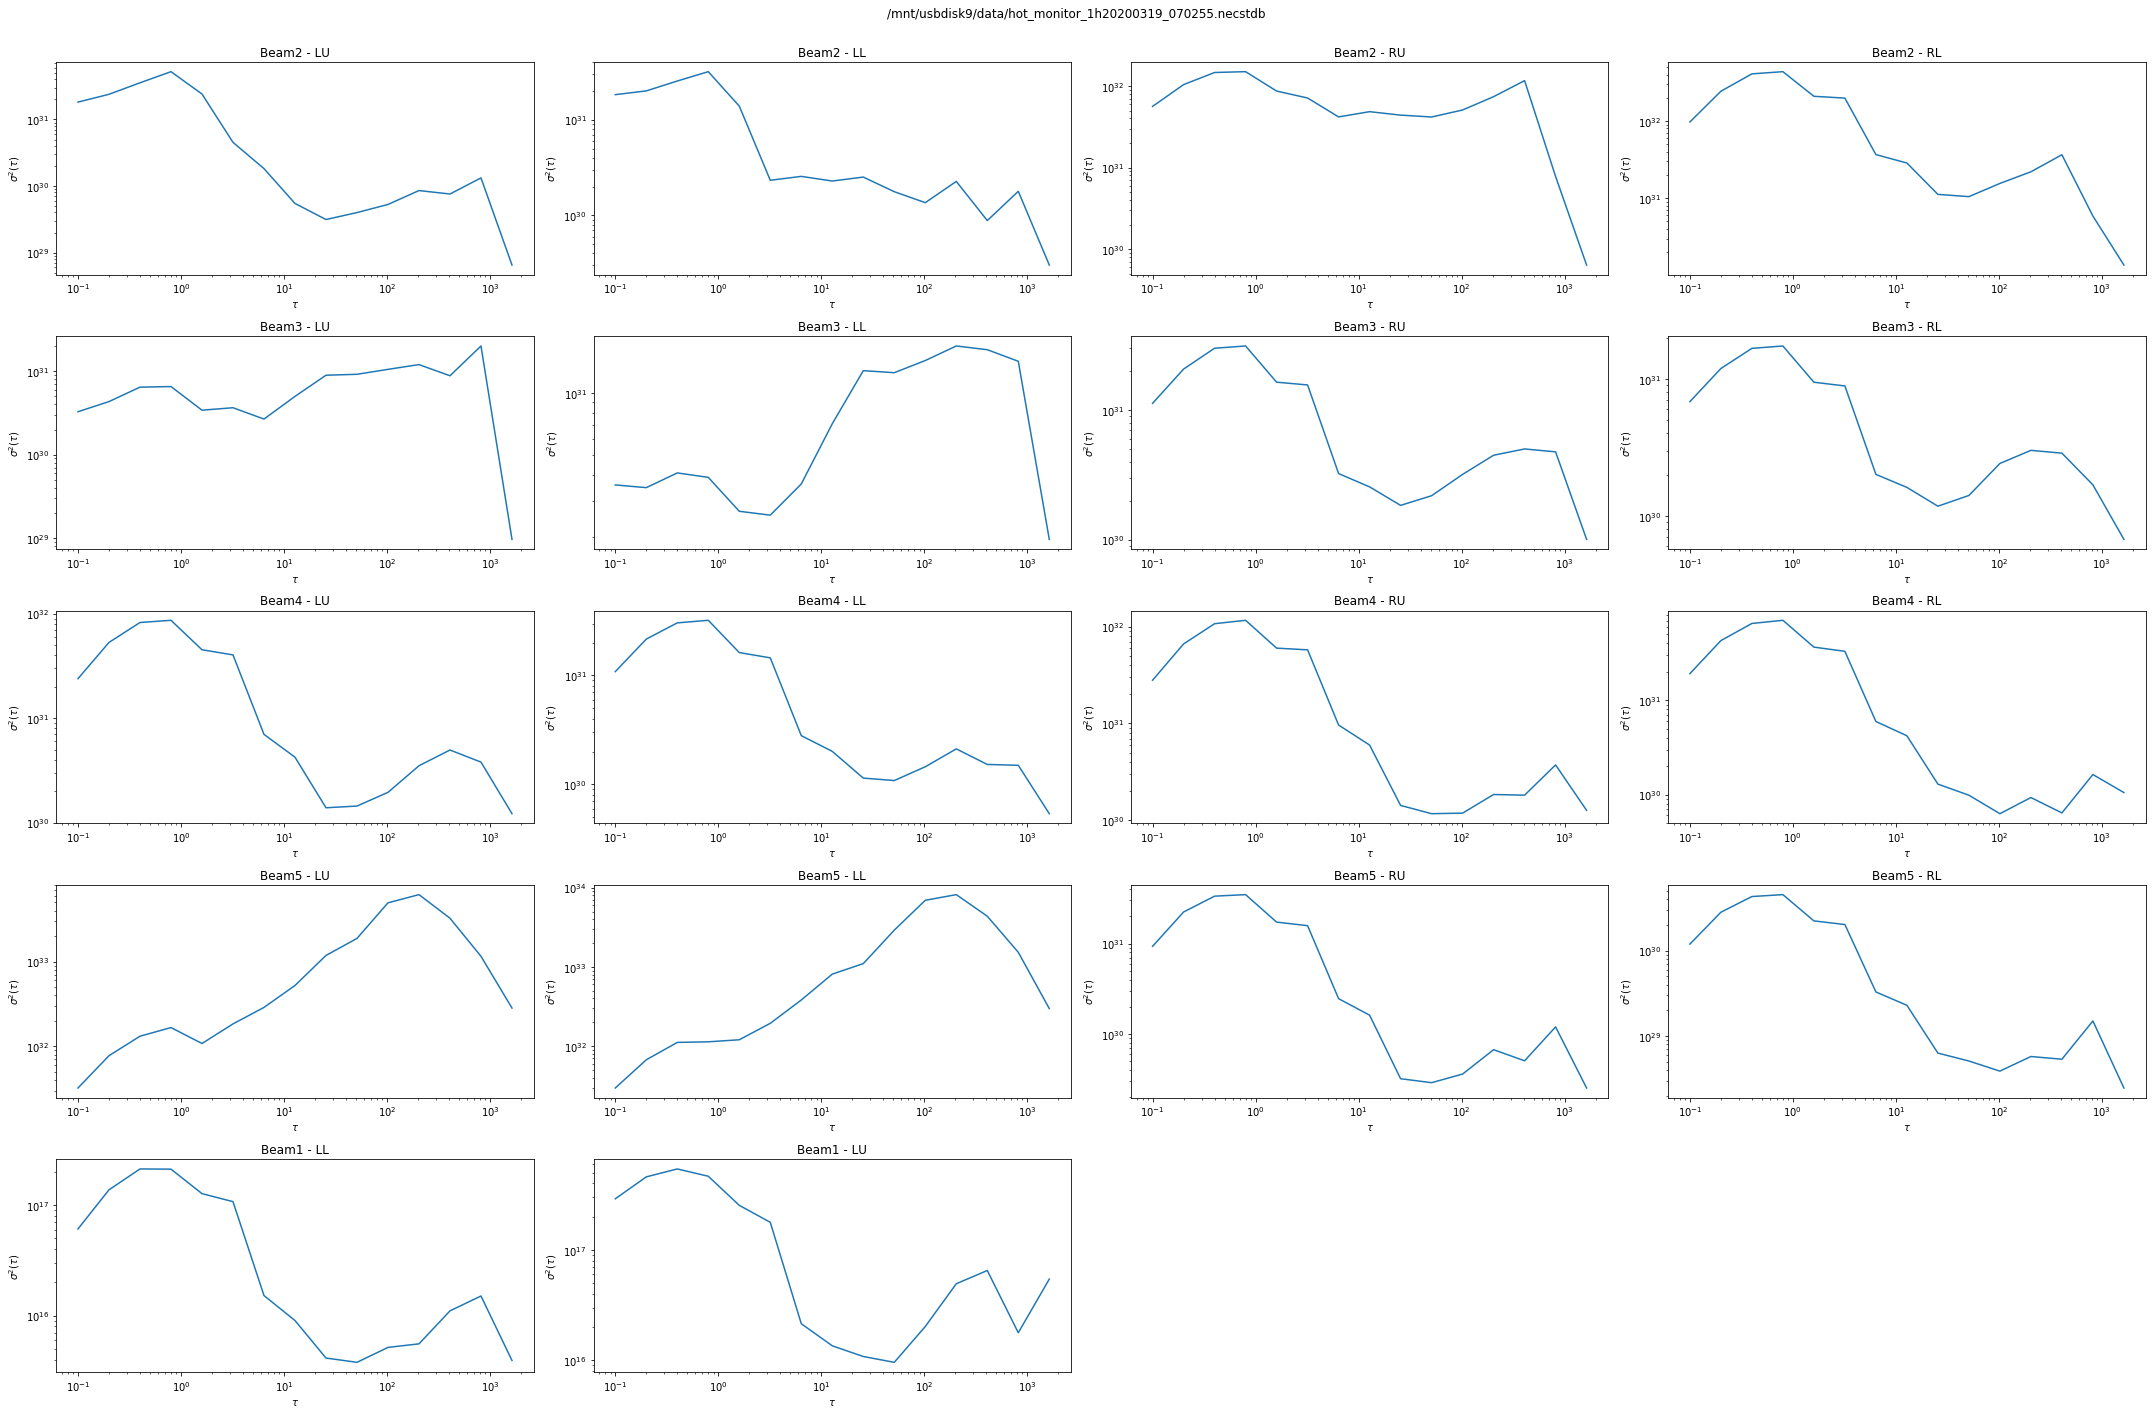

In [37]:
#グラフ作成

mainfig = plt.figure(figsize=(30,20))

ax_list = [mainfig.add_subplot(5,4,i+1) for i in range(18)]

num_100g_list = [num for num in range(1,17)]

x_ax = [0.1*m for m in m_list]


for ax, allan_100g, num_100g in zip(ax_list, allan_100g_list, num_100g_list):
    
    ax.plot(x_ax, allan_100g)
    ax.set_title(beamname['xffts_power_board'+str(num_100g).zfill(2)])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\sigma^2(\tau)$")
    
num_200g_list = [1,2]
    
for ax, allan_200g, num_200g in zip(ax_list[16:], allan_200g_list, num_200g_list):

    ax.plot(x_ax, allan_200g)
    ax.set_title(beamname['ac240_tp_data_'+str(num_200g)])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\sigma^2(\tau)$")

mainfig.suptitle(path)
mainfig.tight_layout(rect=[0,0,1,0.96]) #タイトル , subplotsの調整